# ANALISI DELLO SPETTRO LOCK-IN

## CI SIAMO PERSI QUALCOSA PER STRADA?

### Hack terribile

Aggiungiamo manualmente i possibili picchi mancanti individuati ad occhio

In [1]:
def aggiungi_possibili_picchi_mancanti(nu0s, gammas, dist):
    import numpy as np

    # assicurati che siano liste "piatte"
    nu0s   = list(np.atleast_1d(nu0s))
    gammas = list(np.atleast_1d(gammas))

    def cat(*parts):
        out = []
        for p in parts:
            if p is None:
                continue
            if isinstance(p, (list, tuple)):
                out.extend(p)
            elif hasattr(p, "tolist"):  # numpy array
                out.extend(p.tolist())
            else:  # scalare
                out.append(p)
        return out

    if dist == 1000:
        nu0s   = cat([2660], nu0s, [2895, 3100])
        gammas = cat([2],    gammas, [2, 2])

    if dist == 40:
        nu0s   = cat([2760], nu0s, [2970, 3130])
        gammas = cat([2],    gammas, [2, 2])
        

    if dist == 39:
        nu0s   = cat([2760], nu0s, [2970])
        gammas = cat([2],    gammas, [2])

    if dist == 33:
        nu0s   = cat([2740], nu0s, [2990])
        gammas = cat([2],    gammas, [2])

    if dist == 30:
        nu0s   = cat([2720], [nu0s[0]], [2822], nu0s[1:-1], [2891], [nu0s[-1]], [3000])
        gammas = cat([2], [gammas[0]], [2], gammas[1:-1], [2], [gammas[-1]], [2])

    if dist == 24:
        nu0s   = cat([nu0s[0]], [2788], nu0s[1:-1], [2936], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],  gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2665], nu0s, [3060])
        gammas = cat([2],    gammas, [2])

    if dist == 22:
        nu0s   = cat([nu0s[0]], [2765], nu0s[1:-1], [2925, 2945], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2, 2],   [gammas[-1]])
        nu0s   = cat([2640], nu0s, [3075])
        gammas = cat([2],    gammas, [2])

    if dist == 20:
        nu0s   = cat([nu0s[0]], [2730], nu0s[1:-1], [3005], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2605], nu0s, [3130])
        gammas = cat([2],    gammas, [2])

    if dist == 19:
        nu0s   = cat([nu0s[0]], [2710], nu0s[1:-1], [3020], [nu0s[-1]])
        gammas = cat([gammas[0]], [2],   gammas[1:-1], [2],   [gammas[-1]])
        nu0s   = cat([2585], nu0s, [3150])
        gammas = cat([2],    gammas, [2])

    if dist == 17:
        nu0s   = cat([nu0s[0]], [2655, 2730], [nu0s[1]], [2790], nu0s[2:-1], [nu0s[-1]])
        gammas = cat([gammas[0]], [5, 5],      [gammas[1]], [2],  gammas[2:-1], [gammas[-1]])
        nu0s   = cat([2525], nu0s, [3185])
        gammas = cat([2],    gammas, [2])

    return nu0s, gammas
        

### Codice originale con aggiunta della funzione correttiva

In [2]:
from odmr_subroutines.analysis_subroutines import *

In [3]:
def make_N_derivate_lorentziane(N_deeps):
    def fit_function(nu, *params):
        result = 0
        for i in range(N_deeps):
            A = params[3*i]
            gamma = params[3*i + 1]
            nu0 = params[3*i + 2]
            # da metà del grafico il segno va invertito
            if nu0 > 2860:
                A = -A
            result += derivata_lorentziana(nu, A, gamma, nu0)
        return result
    return fit_function

In [4]:
def make_N_lorentziane(N_deeps):
    def fit_function(nu, *params):
        result = 0
        for i in range(N_deeps):
            A = params[3*i]
            gamma = params[3*i + 1]
            nu0 = params[3*i + 2]
            '''# da metà del grafico il segno va invertito
            if nu0 > 2860:
                A = -A'''
            result += lorentziana(nu, A, gamma, nu0, 0)
        return result
    return fit_function

In [5]:
max_a = -10

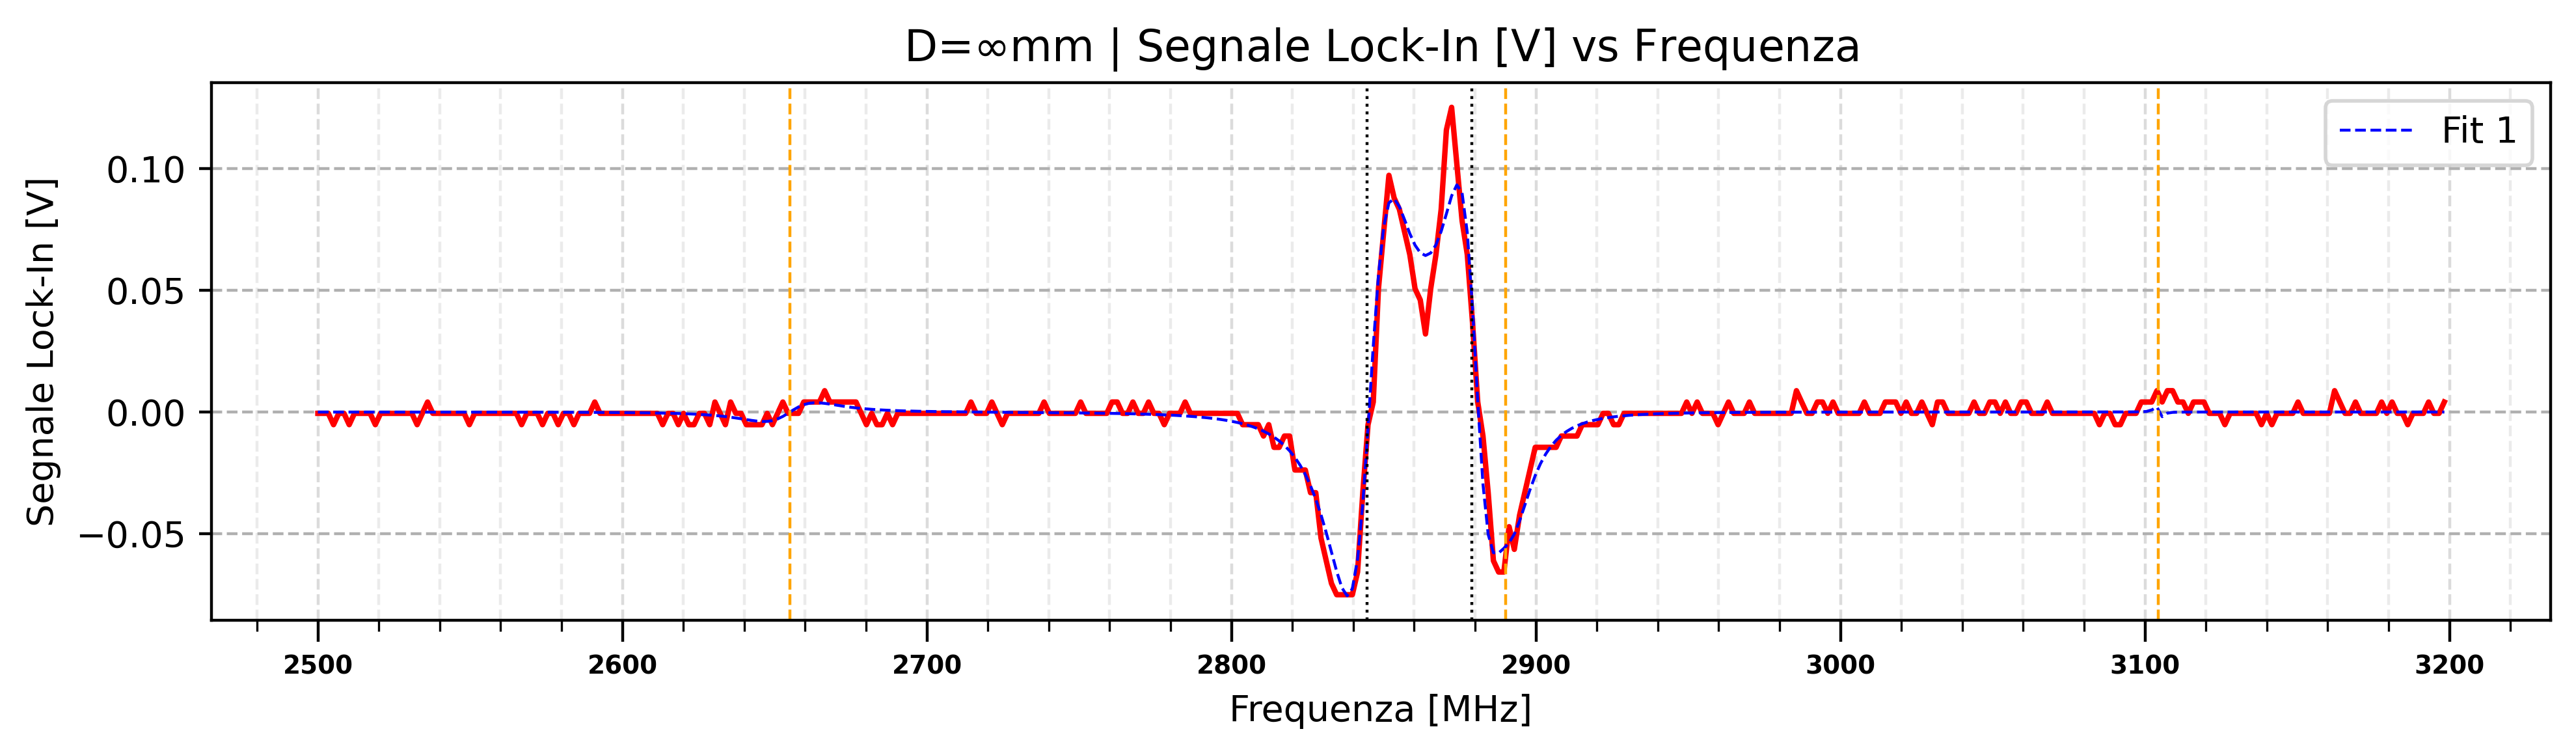

Centri:
  lockin    |     odmr
2655.00000  |  ---
2845.44129  |  2844.55630
2880.29326  |  2879.00423
2890.00000  |  ---
3104.40231  |  ---
Per Matlab: [2655 2845 2880 2890 3104 ]


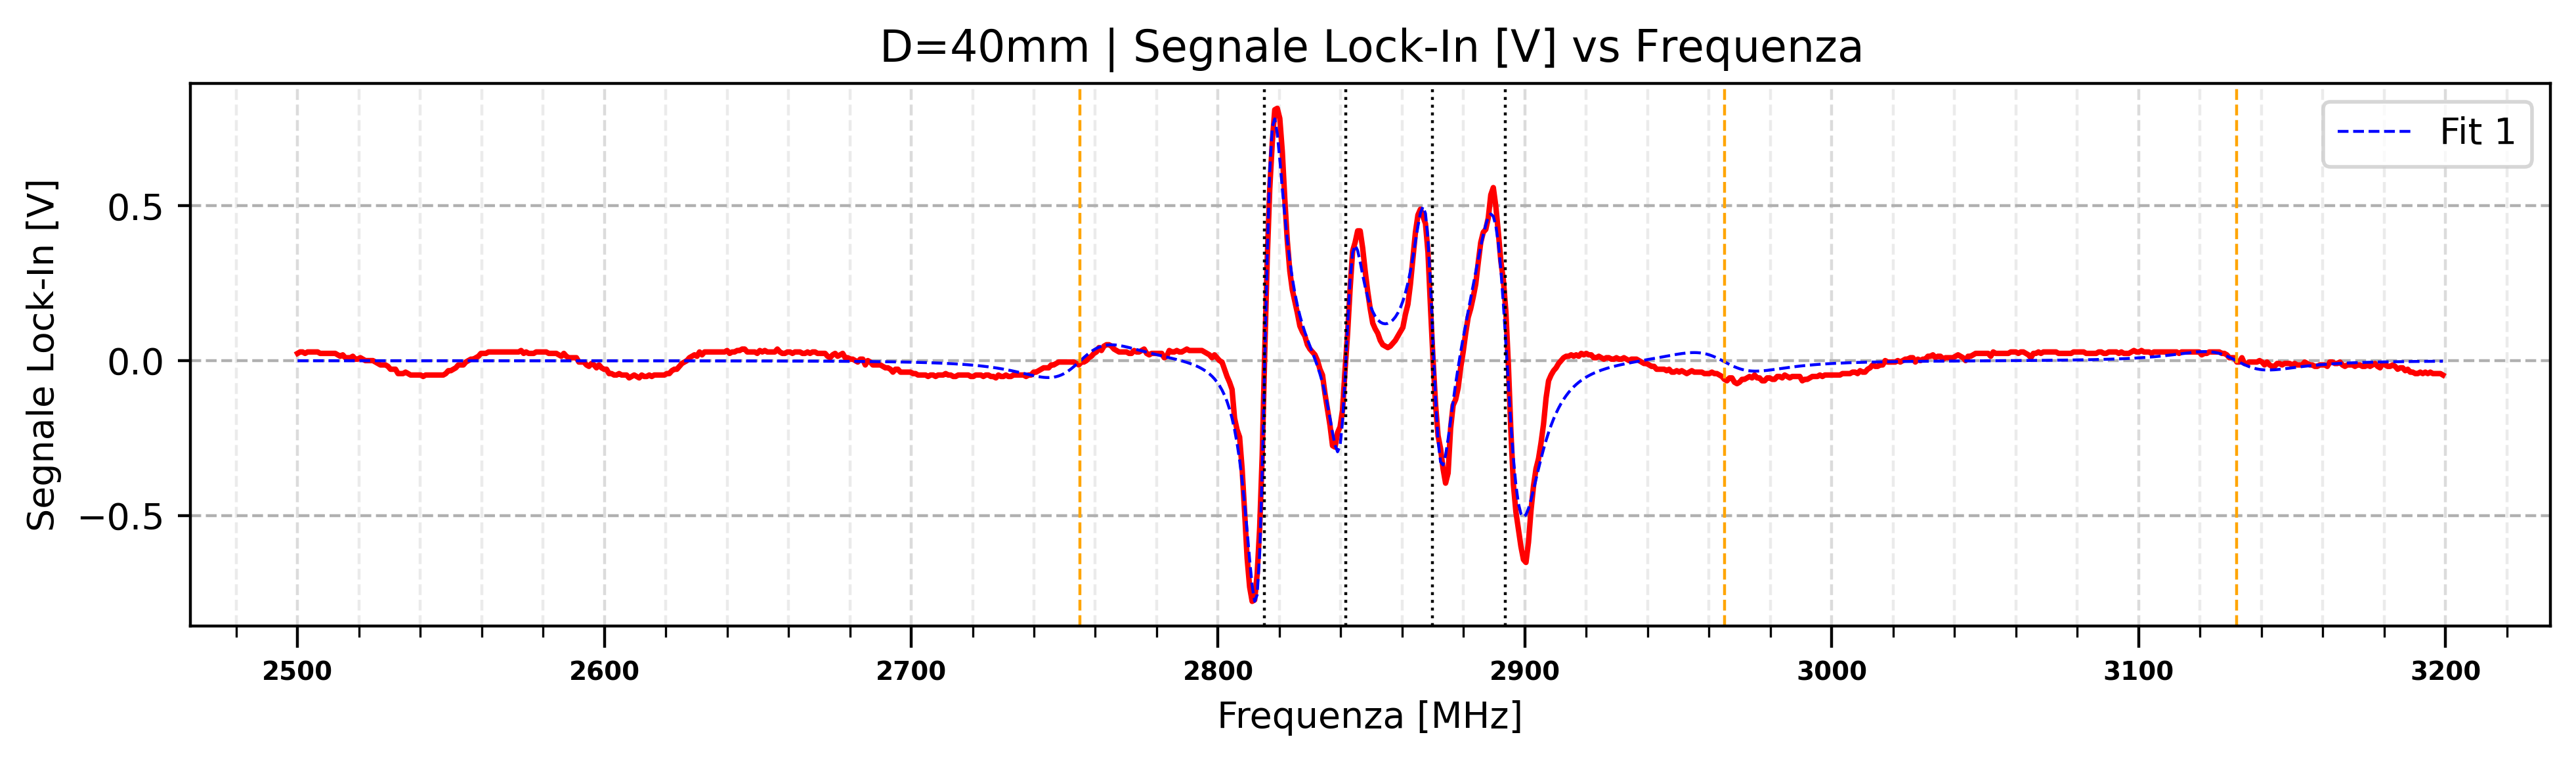

Centri:
  lockin    |     odmr
2755.00000  |  ---
2815.23259  |  2815.08272
2841.84145  |  2841.71268
2869.99487  |  2869.78206
2894.21945  |  2893.69407
2965.00000  |  ---
3131.91969  |  ---
Per Matlab: [2755 2815 2842 2870 2894 2965 3132 ]


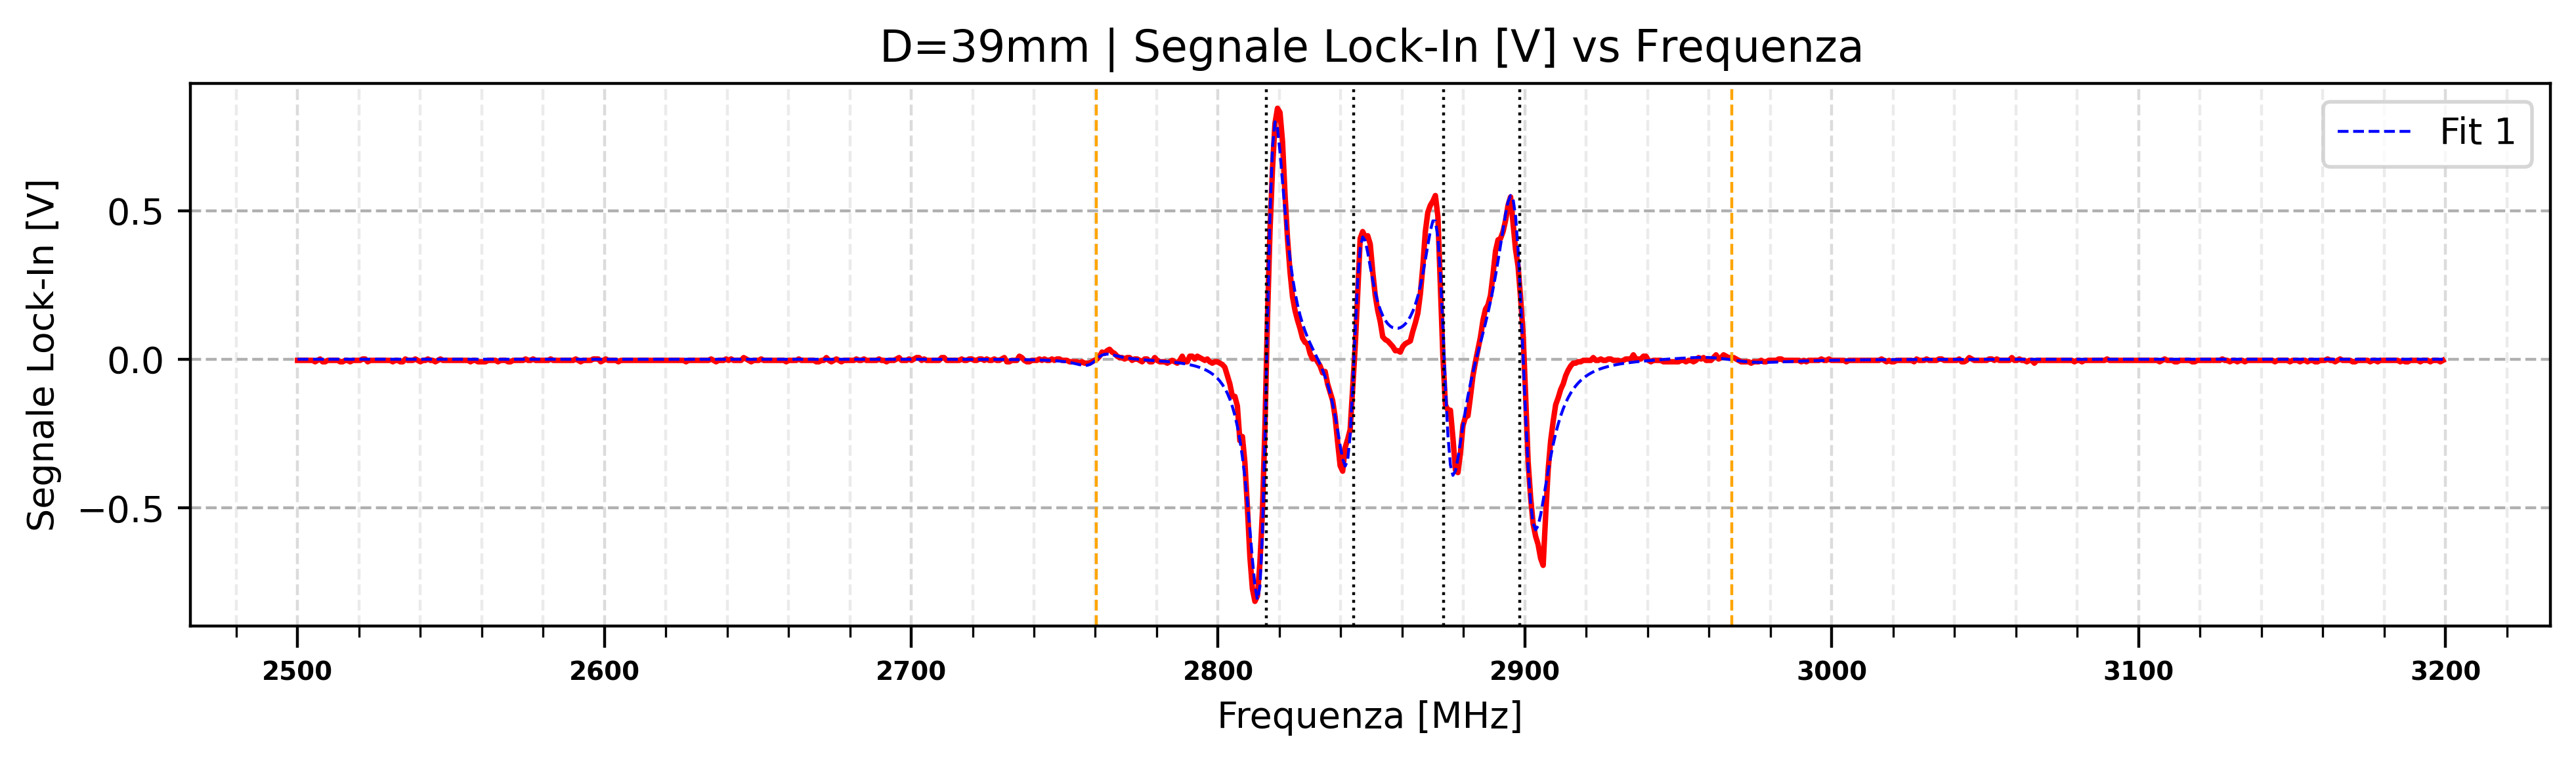

Centri:
  lockin    |     odmr
2760.24800  |  ---
2815.82986  |  2815.64465
2844.39855  |  2844.11209
2873.56338  |  2873.50805
2899.49573  |  2898.40028
2967.33034  |  ---
Per Matlab: [2760 2816 2844 2874 2899 2967 ]


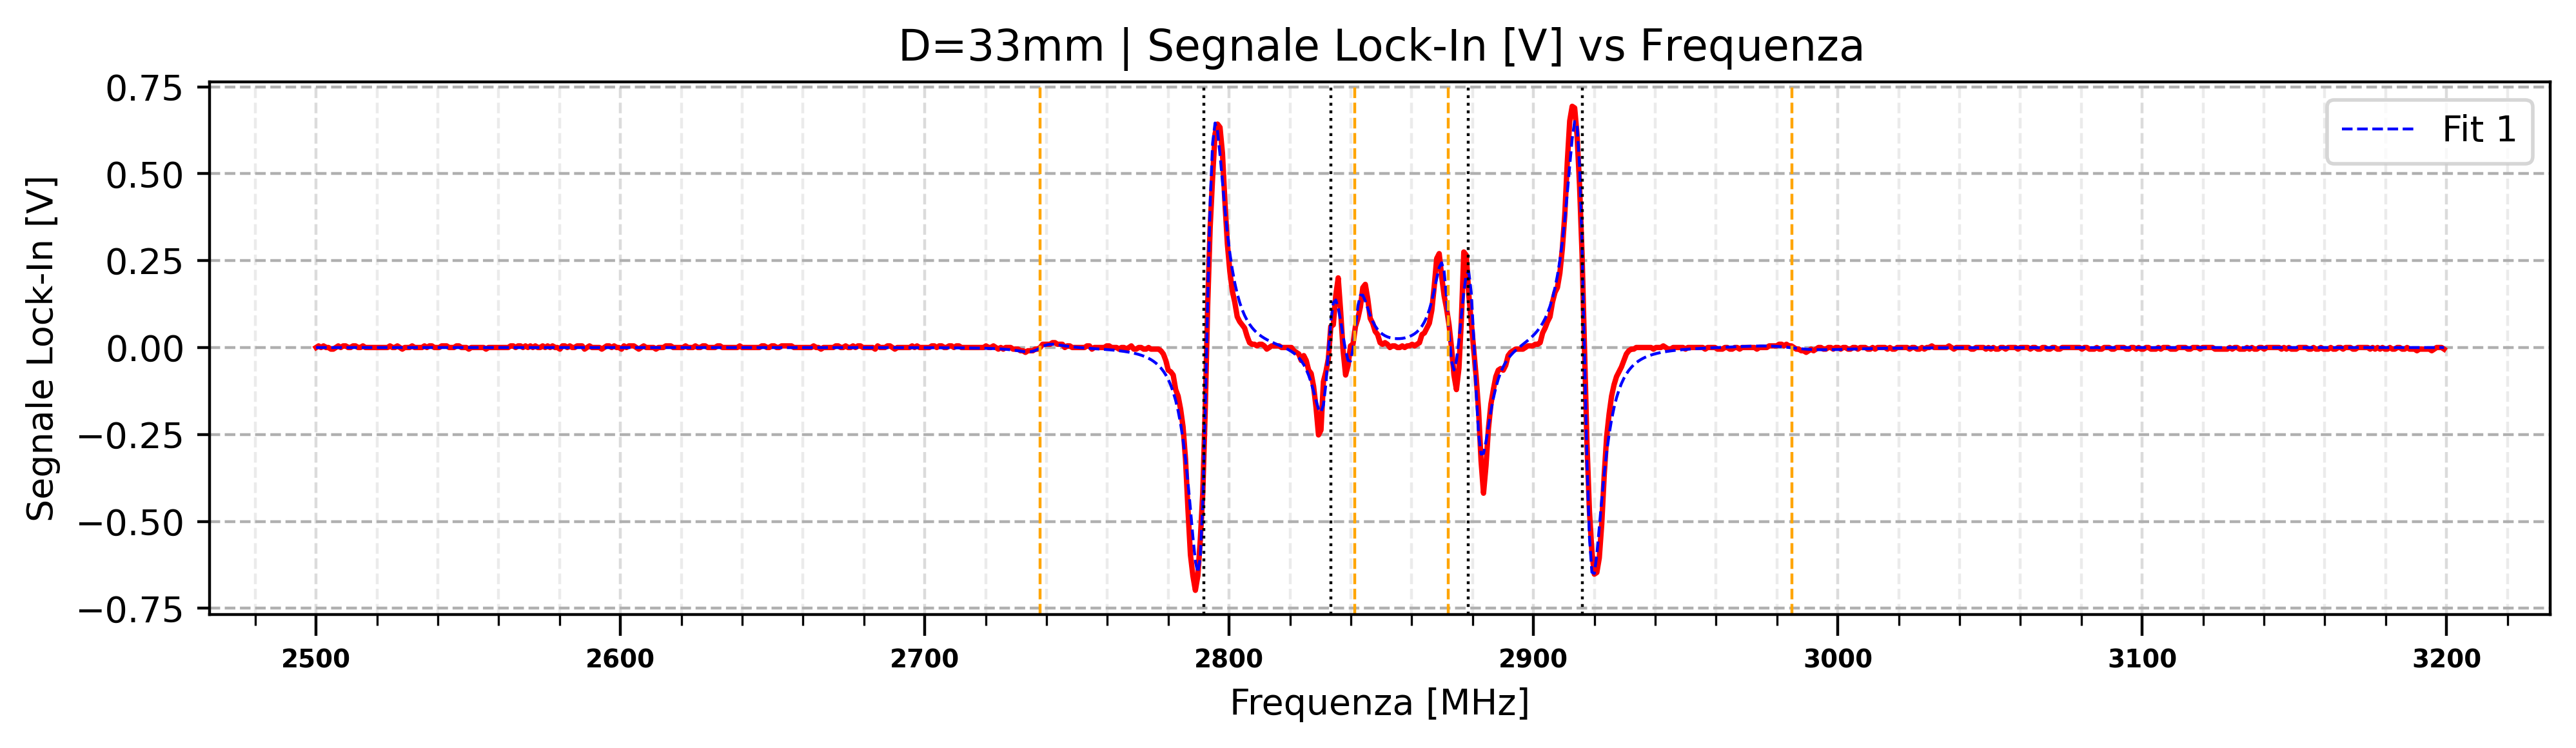

Centri:
  lockin    |     odmr
2737.83313  |  ---
2792.60582  |  2791.63047
2832.55623  |  2833.46923
2841.37381  |  ---
2871.96700  |  ---
2880.68293  |  2878.51504
2916.71680  |  2916.03925
2985.00000  |  ---
Per Matlab: [2738 2793 2833 2841 2872 2881 2917 2985 ]


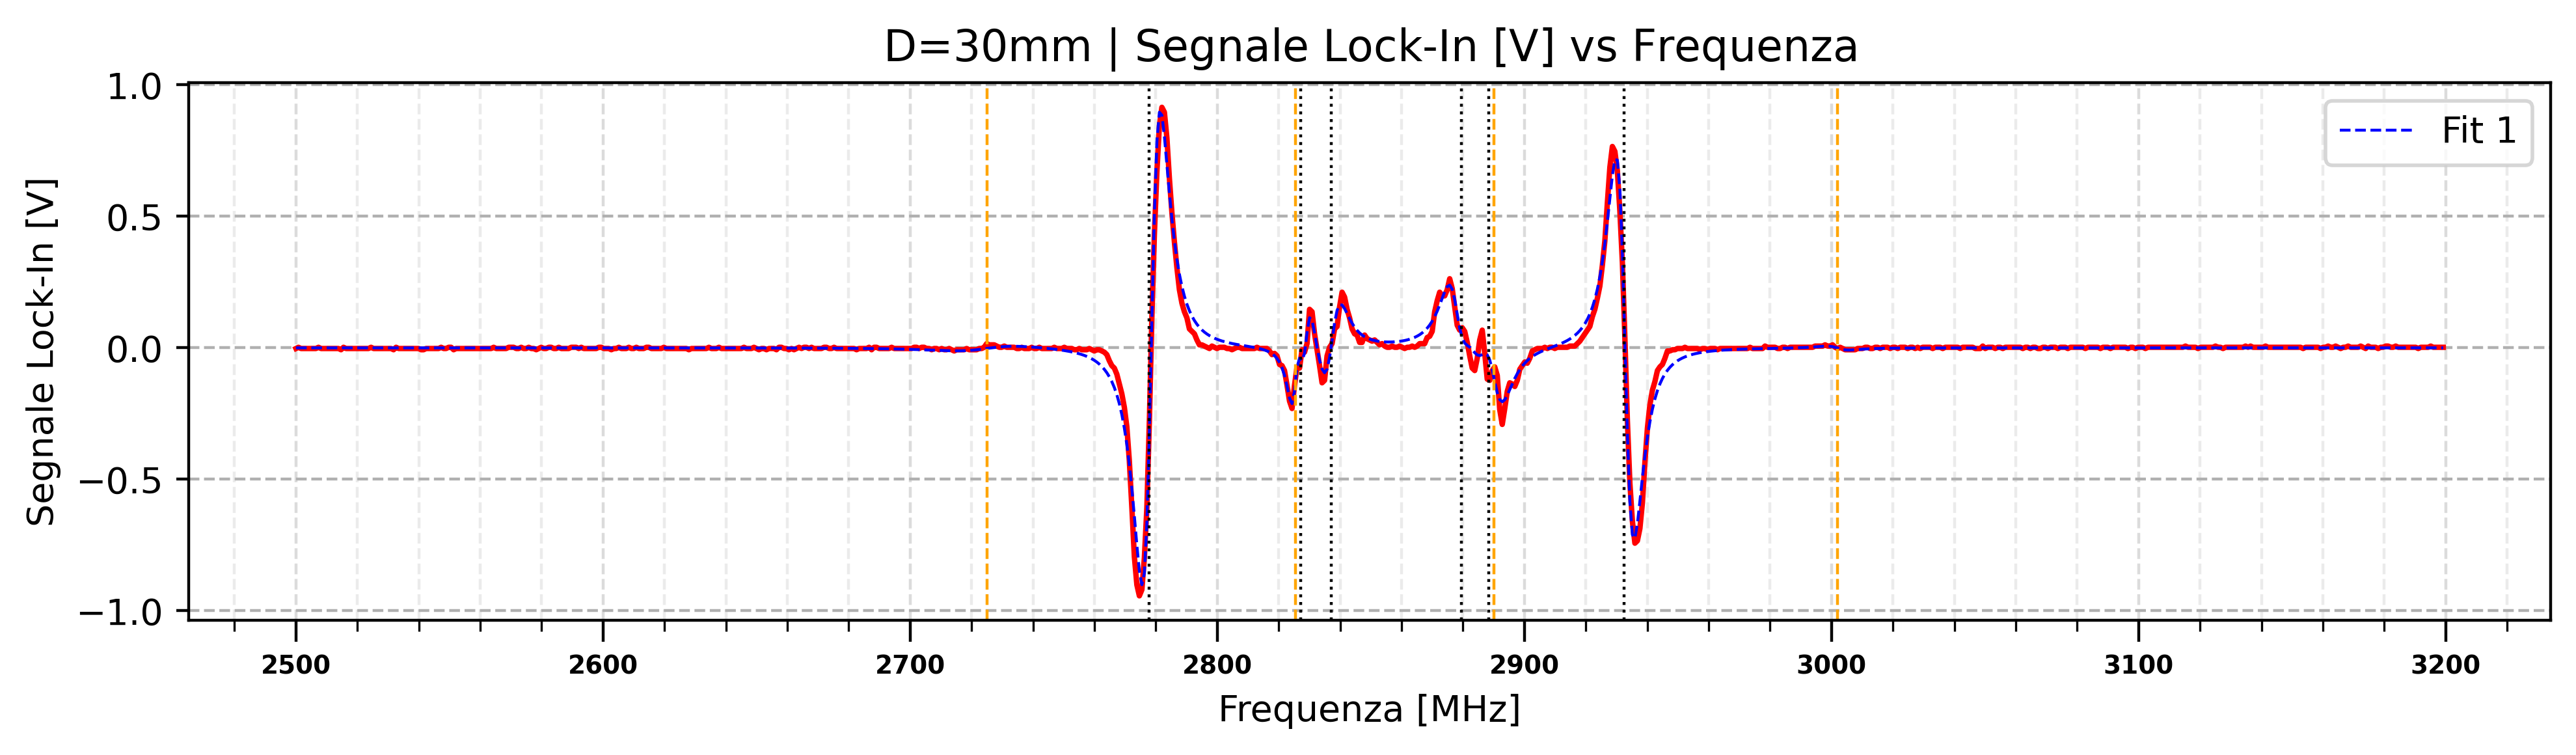

Centri:
  lockin    |     odmr
2724.98788  |  ---
2778.49153  |  2777.69641
2825.51114  |  ---
2828.93381  |  2827.21598
2837.35183  |  2837.11169
2877.97138  |  2879.46904
2883.46762  |  2888.46762
2890.05853  |  ---
2932.76064  |  2932.49721
3002.01150  |  ---
Per Matlab: [2725 2778 2826 2829 2837 2878 2883 2890 2933 3002 ]


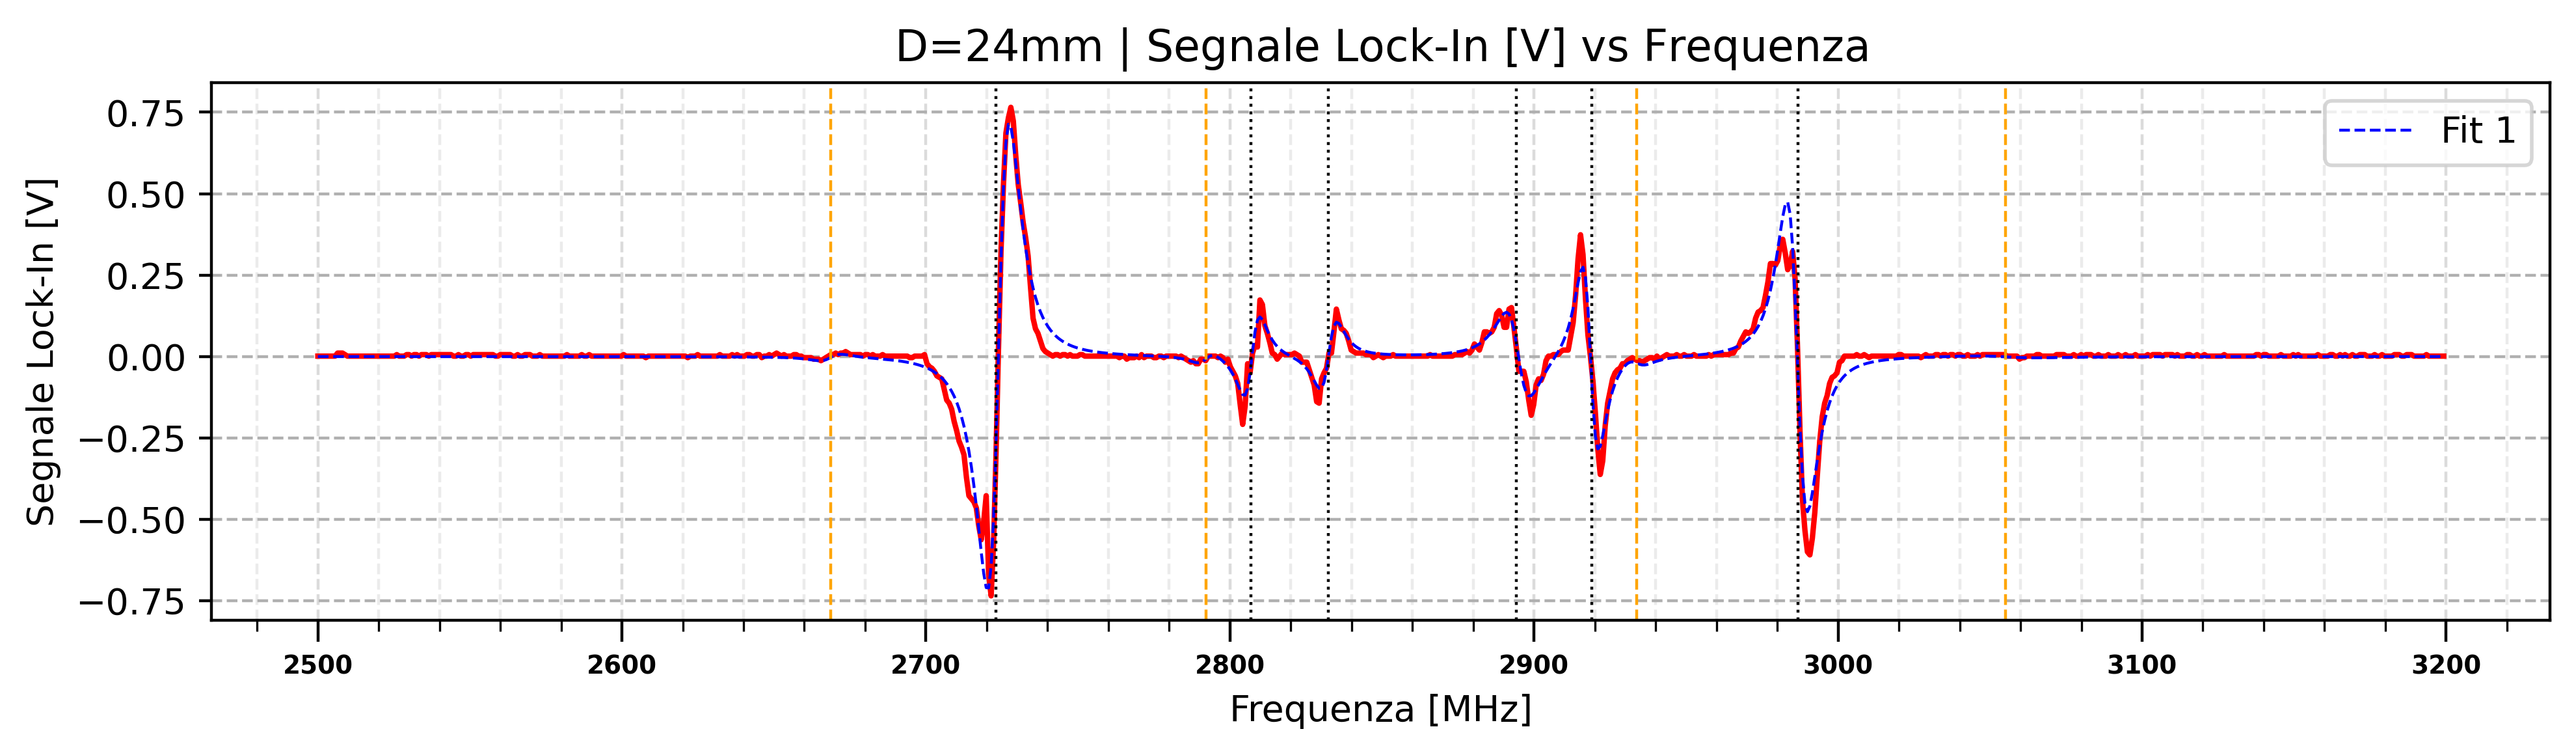

Centri:
  lockin    |     odmr
2668.64039  |  ---
2723.82289  |  2723.03471
2792.14870  |  ---
2807.24142  |  2806.81932
2832.43154  |  2832.39144
2894.78857  |  2894.23455
2918.60041  |  2919.08097
2933.67259  |  ---
2986.57726  |  2986.74085
3055.00000  |  ---
Per Matlab: [2669 2724 2792 2807 2832 2895 2919 2934 2987 3055 ]


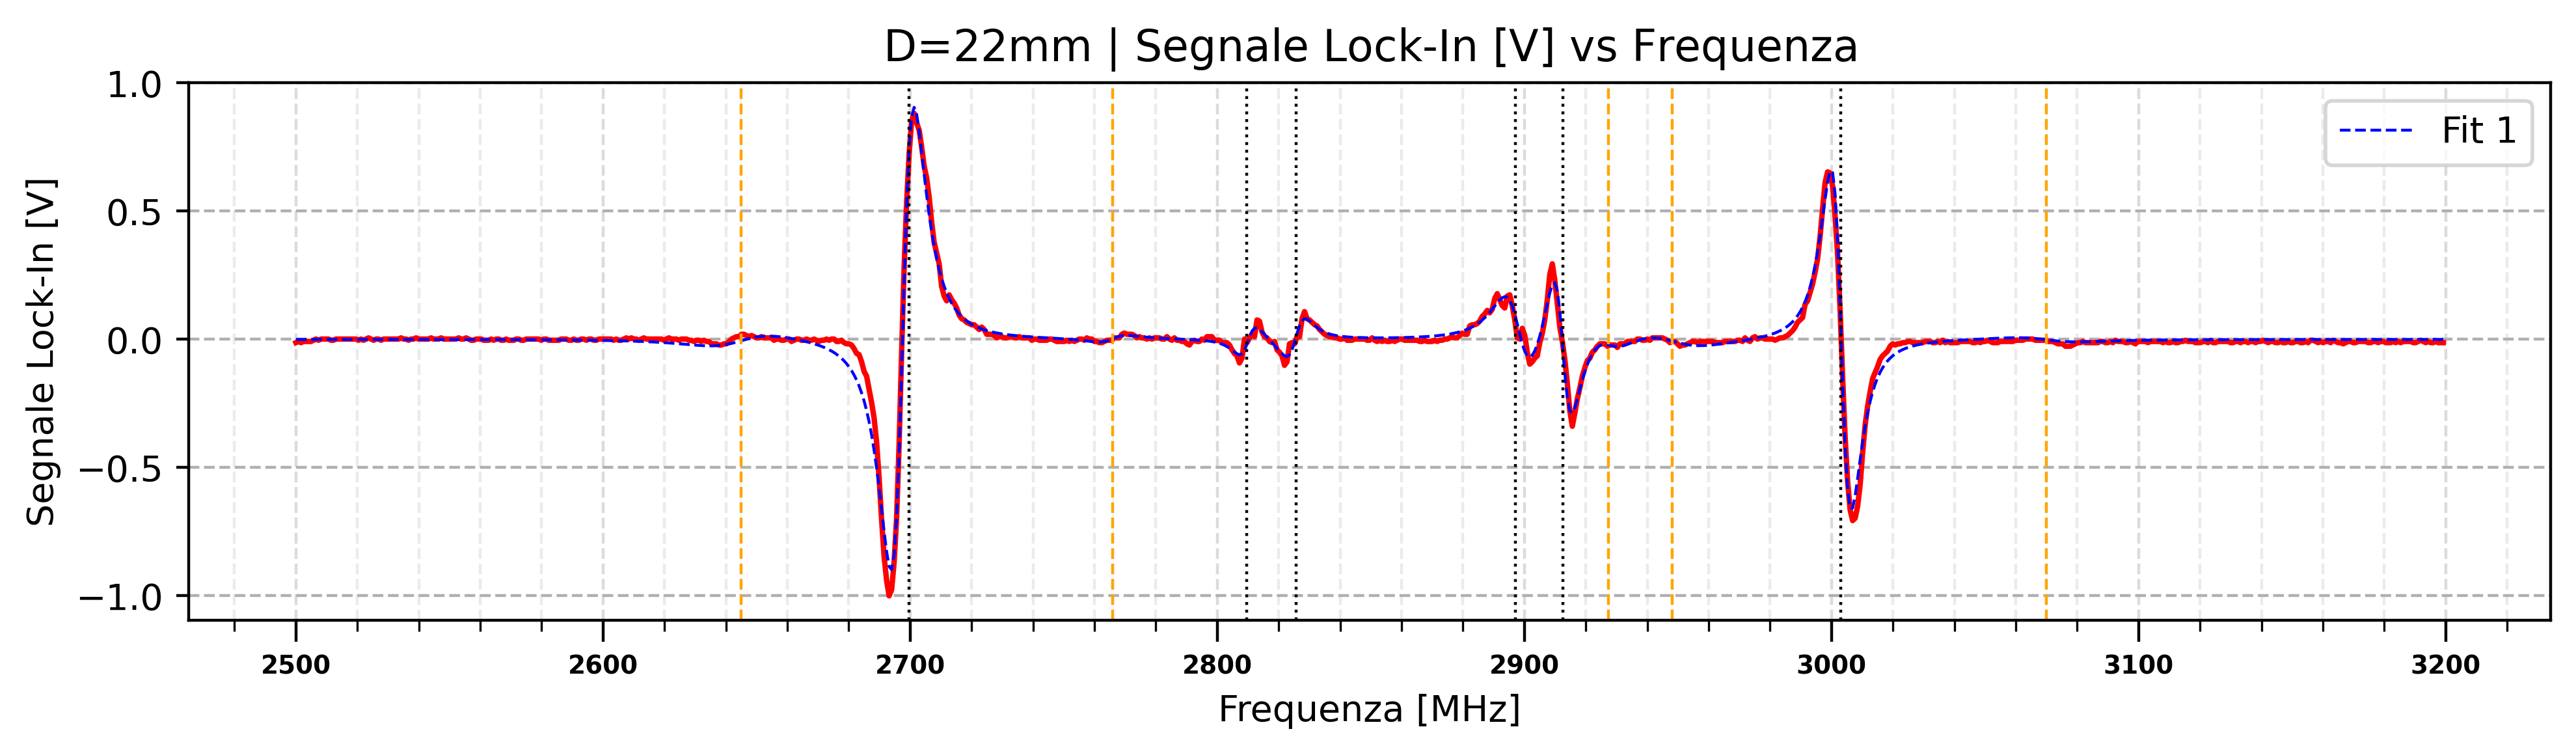

Centri:
  lockin    |     odmr
2645.00000  |  ---
2697.50772  |  2699.54723
2765.94663  |  ---
2810.02361  |  2809.65453
2825.55078  |  2825.63927
2898.11827  |  2897.00257
2912.48435  |  2912.60723
2927.26586  |  ---
2948.07999  |  ---
3003.15162  |  3003.09741
3070.00000  |  ---
Per Matlab: [2645 2698 2766 2810 2826 2898 2912 2927 2948 3003 3070 ]


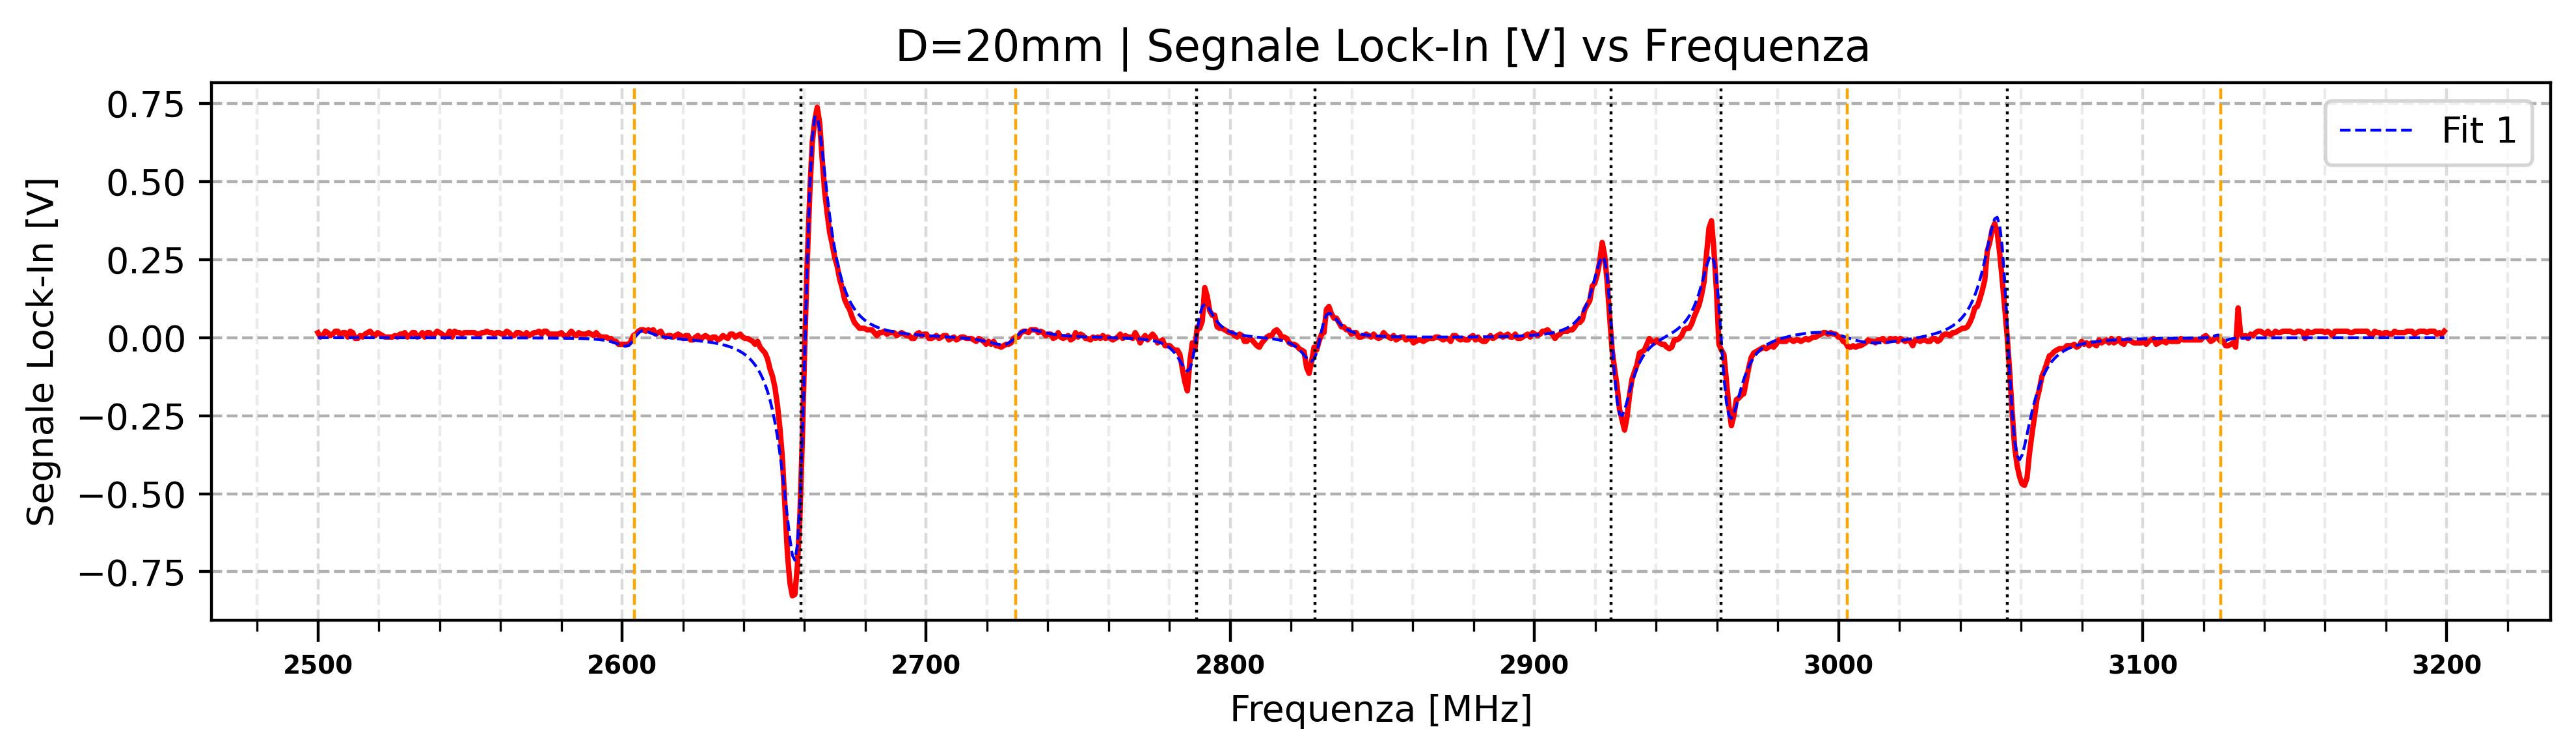

Centri:
  lockin    |     odmr
2604.03953  |  ---
2660.22030  |  2658.89145
2729.45888  |  ---
2788.77626  |  2788.99757
2829.54569  |  2827.76605
2925.47433  |  2925.28289
2961.38305  |  2961.40860
3002.80241  |  ---
3055.67453  |  3055.39827
3125.73786  |  ---
Per Matlab: [2604 2660 2729 2789 2830 2925 2961 3003 3056 3126 ]


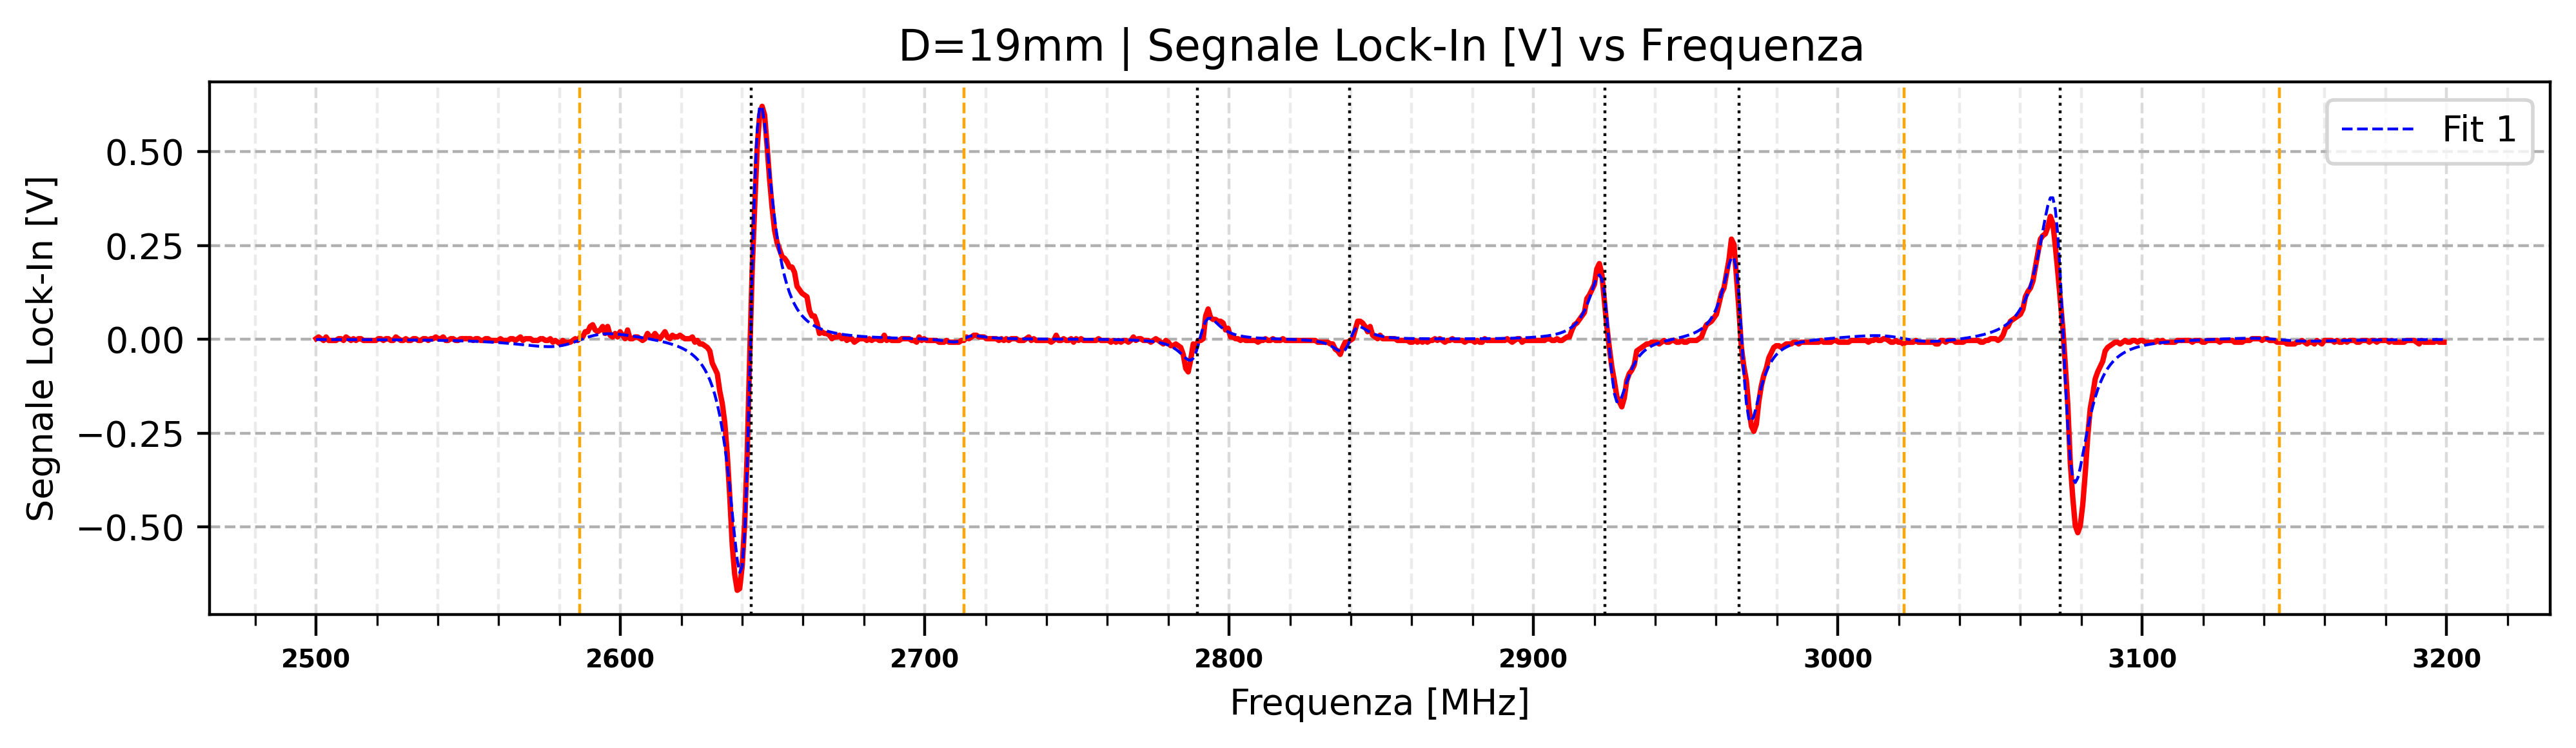

Centri:
  lockin    |     odmr
2586.64477  |  ---
2642.74092  |  2642.95991
2712.86593  |  ---
2790.34315  |  2789.58385
2839.85727  |  2839.67311
2924.69211  |  2923.55197
2968.41654  |  2967.48125
3021.76986  |  ---
3074.10757  |  3073.10975
3145.00000  |  ---
Per Matlab: [2587 2643 2713 2790 2840 2925 2968 3022 3074 3145 ]


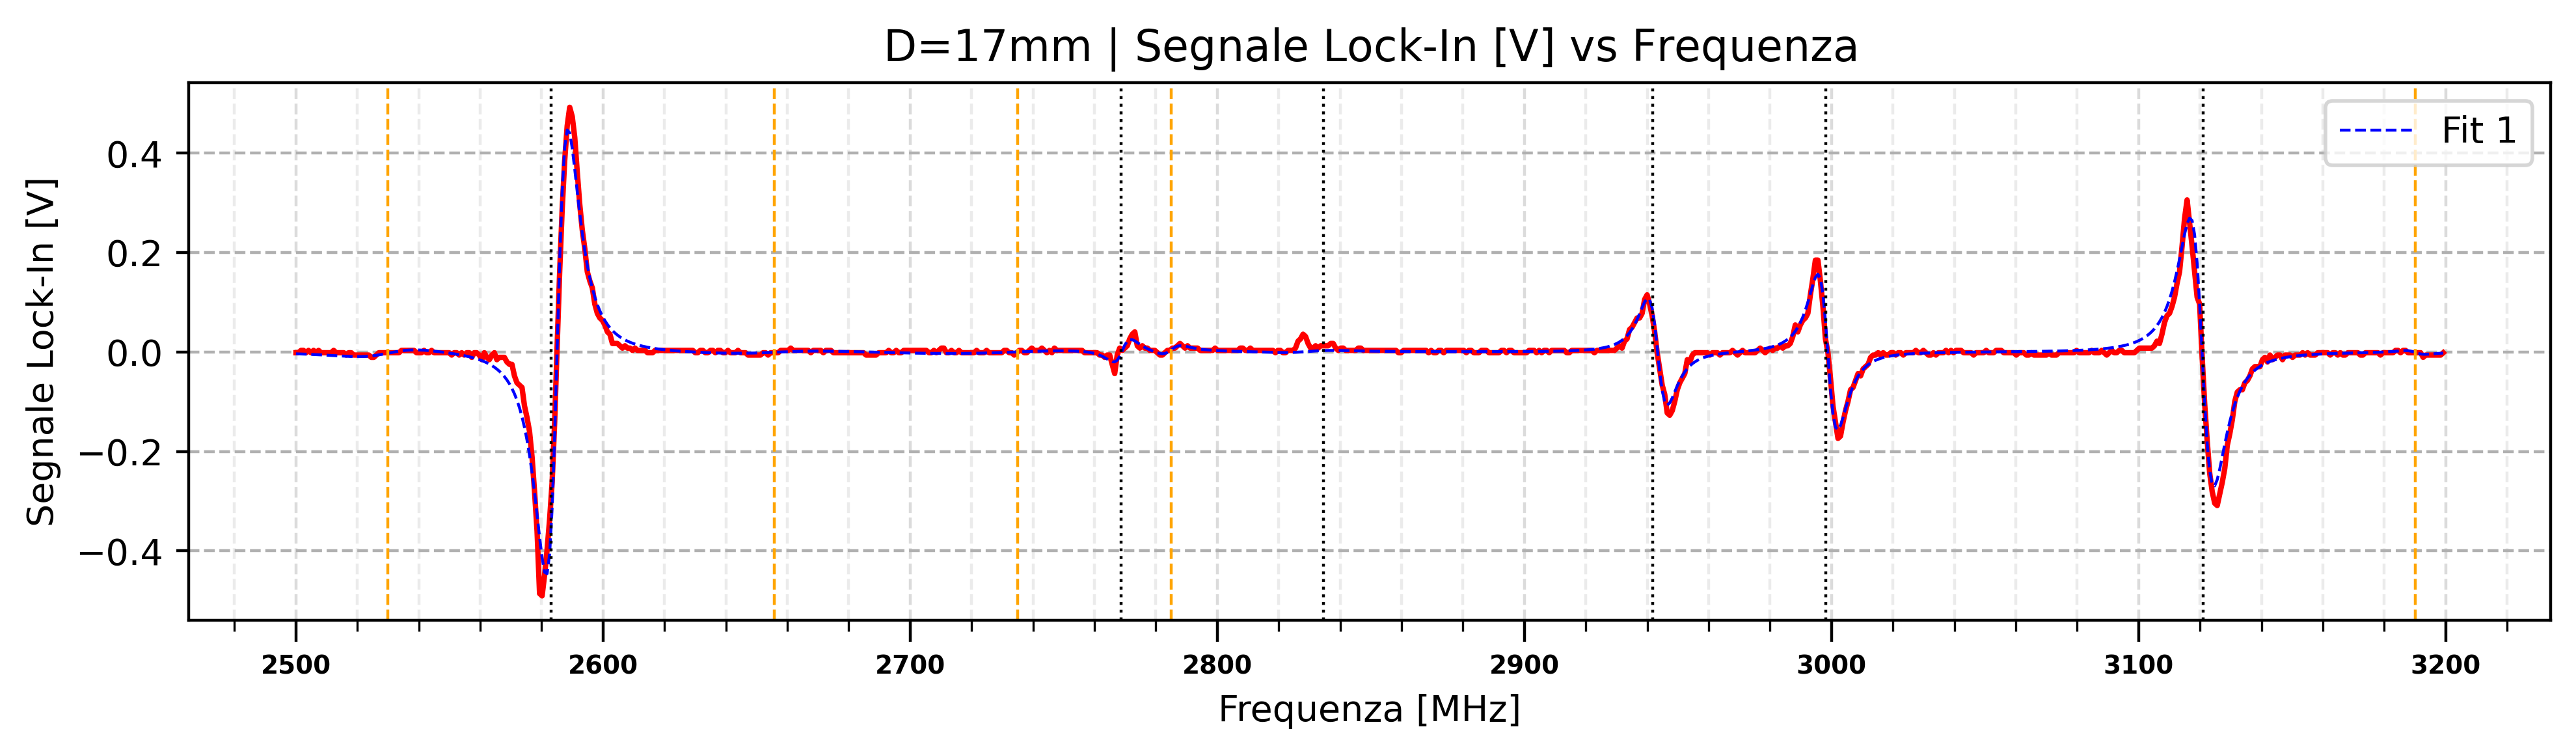

Centri:
  lockin    |     odmr
2530.00000  |  ---
2585.00935  |  2583.03775
2655.84308  |  ---
2735.00000  |  ---
2769.06016  |  2768.75160
2785.00000  |  ---
2829.47545  |  2834.47545
2943.36676  |  2941.80317
2998.74525  |  2998.15610
3120.64607  |  3121.04184
3189.99991  |  ---
Per Matlab: [2530 2585 2656 2735 2769 2785 2829 2943 2999 3121 3190 ]


In [6]:
from data.from_spectra_fit_results import nu0s, gammas

def build_name (dist):
    return f"data/cristallo2_aligned_cleaned/odmr_dist_{dist}_cleaned.csv"

distanze = [17, 19, 20, 22, 24, 30, 33, 39, 40, 1000]
nu0s_lockin = {}
gammas_lockin = {}

# per salvare i centri originali e le initial guesses
originals_nu0s_dict = {}
initial_guesses_nu0s_dict = {}

# per un ipotetico uso futuro
cleaned_lockin_spectra = {}

# Primo loop inutile ma devo normalizzare gli spettri
massimo_assoluto = 0
for i, dist in enumerate(reversed(distanze)):
    # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    # cerco il massimo assoluto
    if np.max(np.abs(spettro['lock'])) > massimo_assoluto:
        massimo_assoluto = np.max(np.abs(spettro['lock']))

# Nel loop:
for i, dist in enumerate(reversed(distanze)):
    nu0s_lockin[dist] = []
    gammas_lockin[dist] = []
    cleaned_lockin_spectra[dist] = {}
    
    originals_nu0s = nu0s[dist].copy()
    originals_nu0s_dict[dist] = originals_nu0s.copy()
    
     # costruisco il nome del file
    nome = build_name(dist)
    # leggo il file e immagazzino le informazioni in un oggetto 'spettro' (dizionario)
    spettro = leggi_file_odmr(nome)
    # correggo lo spettro lock-in
    spettro = trasla_spettro_lock_in(spettro)
    # normalizzo lo spettro lock-in
    spettro['lock'] = spettro['lock'] / massimo_assoluto
    
    cleaned_lockin_spectra[dist]['freq'] = spettro['freq'].copy()
    cleaned_lockin_spectra[dist]['lock'] = spettro['lock'].copy()
    
    
    # Crea la funzione di fit specifica per questo numero di deep
    # HACK: a 33mm il lock-in vede una separazione in più! vanno aggiunti due deep
    if dist == 33:
        nu0s[dist] = nu0s[dist][:2] + [nu0s[dist][1] + 3, nu0s[dist][2] - 5] + nu0s[dist][2:]
        gammas[dist] = gammas[dist][:2] + [gammas[dist][1], gammas[dist][1]] + gammas[dist][2:]
        
        
    nu0s[dist], gammas[dist] = aggiungi_possibili_picchi_mancanti(nu0s[dist], gammas[dist], dist)
    initial_guesses_nu0s_dict[dist] = nu0s[dist].copy()
    
    # quanti deep mi aspetto?
    N_deeps = len(nu0s[dist]) 
    fit_func = make_N_derivate_lorentziane(N_deeps)
    
    # Parametri iniziali (SENZA N_deeps all'inizio)
    p0 = []
    low = []
    upp = []
    for j in range(N_deeps):
        p0 += [5, gammas[dist][j], nu0s[dist][j]]
        low += [0, gammas[dist][j]/1.5, nu0s[dist][j] - 5]
        upp += [np.inf, gammas[dist][j]*9, nu0s[dist][j] + 5] # prima: [np.inf, gammas[dist][j]*1.5, nu0s[dist][j] + 5]

    # fitto lo spettro lock-in
    popt, pcov = curve_fit(fit_func, spettro['freq'], spettro['lock'], p0=p0, bounds=(low, upp), maxfev=10000)
    # lista dei picchi nuovi 'mancanti' trovati
    new_piks = [popt[3*j + 2] for j in range(N_deeps) if nu0s[dist][j] not in originals_nu0s]
    # plotto lo spettro
    # plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], fit_func(spettro['freq'], *popt))])
    plot_odmr(spettro, key='lock', dist=dist, fit_curves=[(spettro['freq'], fit_func(spettro['freq'], *popt))], option=True, originals_nu0s=originals_nu0s, new_piks=new_piks)
    
    # printo i centri trovati
    print("Centri:")
    print("  lockin    |     odmr")  
    for j in range(N_deeps):
        nu0s_lockin[dist].append(popt[3*j + 2])
        gammas_lockin[dist].append(popt[3*j + 1])
        
        pik = popt[3*j + 2]
        original = nu0s[dist][j]
        if original in originals_nu0s:
            print(f"{pik:.5f}  |  {original:.5f}")
        else:
            print(f"{pik:.5f}  |  ---")
    stringa = ''
    for n in nu0s_lockin[dist]:
        stringa += (f"{n:.0f} ")
    print(f"Per Matlab: [{stringa}]")

    # SALVATAGGIO DELLA MULTI-LORENTZIANA
    nome_fit = f"data/cristallo2_n_lorentzians/odmr_dist_{dist}_lorentz.csv"
    freq_data = spettro['freq']
    graph_function = make_N_lorentziane(N_deeps)
    # HACK: riscalo le lorentziane troppo basse
    hacked_params = []
    for j in range(N_deeps):
        if lorentziana(popt[3*j+2], popt[3*j], popt[3*j + 1], popt[3*j + 2], 0) < -0.2:
            hacked_params += [popt[3*j], popt[3*j + 1], popt[3*j + 2]]
        else: 
            hacked_params += [popt[3*j]*20, popt[3*j + 1]/2, popt[3*j + 2]]
    
    fit_data = graph_function(spettro['freq'], *popt) / 9.07159411734923 # normalizza

    # Salva i dati in formato CSV
    with open(nome_fit, 'w') as f:
        f.write("  freq    |   fit    \n")
        f.write("----------+----------\n")
        for freq, fit_val in zip(freq_data, fit_data):
            f.write(f"{freq:9.3f} | {fit_val:8.5f}\n")
            

---

# Frequenza v B

I valori di B sono presi dal fit del magnete piccolo, vedi 4-fit_magneti.ipynb

La funzione con cui interpolare è: 
$$
\nu_\pm = D \pm \sqrt{E^2+(\gamma_{fit}\cdot B_{0})^{2}}
$$
con $D=2.87\ \text{GHz}$ e $E=10\ \text{MHz}$. Poi si ricava l'angolo con:
$$
\cos{\alpha} = \frac{\gamma_{fit}}{\gamma} \implies 
\alpha = \arccos{\frac{\gamma_{fit}}{\gamma}}
$$
in cui $\gamma=\pm28\ \text{GHzT}^{-1}$

Occorre anche propagare l'errore da $\gamma_{fit}$ ad $\alpha$, usando la derivata dell'arcocoseno:
$$
\frac{d}{dx} \arccos{x} = \frac{1}{\sqrt{1-x^2}}
$$
pertanto:
$$
\sigma_\alpha = \frac{\sigma_{\gamma_{fit}}}{\gamma\sqrt{1-\left(\frac{\gamma_{fit}}{\gamma}\right)^2}}
$$

In [7]:
previsioni_B = np.array([0.01685433, 0.01270503, 0.01110222, 0.00857636, 0.00671791,
       0.00345788, 0.00255966, 0.00147035, 0.00134735, 0])
err_B = [0.02128, 0.01618, 0.01420, 0.01106, 0.00874, 0.00463, 0.00348] #... non hanno senso questi errori!

### Fit Frequenza v B

Per fare il fit non posso usare le curve organizzate in questo modo. Mi serve un'array per ogni possibile curva 'che si allarga'. Il primo punto azzurro ha due curve con i due verdi dopo, che a loro volta vanno nei due rosa. Poi solo uno dei due rosa si separa e va in entrambi i marroni, mentre il rosa superiore finisce marrone solitario più in alto.

In [8]:
r_distanze = list(reversed(distanze))
r_B = list(reversed(previsioni_B))

In [9]:
# Sicuramente due vettori sono elementari: uno ha prende il primo elemento di ciascun array, l'altro l'ultimo.
primi, ultimi = [], []
err_primi, err_ultimi = [], []

primissimi, ultimissimi = [], []
err_primissimi, err_ultimissimi = [], []

dopo_i_primi, prima_degli_ultimi = [], [] # dopo i primi, non dopo i primissimi!
err_dopo_i_primi, err_prima_degli_ultimi = [], []

nu0s_123_lockin = {}
gammas_123_lockin = {}

for dist in r_distanze:
    nu0s_123_lockin[dist] = [nu0s_lockin[dist][i] for i in range(len(nu0s_lockin[dist])) if initial_guesses_nu0s_dict[dist][i] in originals_nu0s_dict[dist]]
    gammas_123_lockin[dist] = [gammas_lockin[dist][i] for i in range(len(gammas_lockin[dist])) if initial_guesses_nu0s_dict[dist][i] in originals_nu0s_dict[dist]]
    
for dist in r_distanze:
    primi.append(nu0s_123_lockin[dist][0])
    err_primi.append(gammas_123_lockin[dist][0])
    ultimi.append(nu0s_123_lockin[dist][-1])
    err_ultimi.append(gammas_123_lockin[dist][-1])
# Poi ci sono i due intermedi, che prendono il secondo e il penultimo di tutti gli array, dopo il primo ovviamente.
intermedi1, intermedi2 = [], []
err_intermedi1, err_intermedi2 = [], []
intermedi1.append(nu0s_123_lockin[1000][0]) 
intermedi2.append(nu0s_123_lockin[1000][1])
err_intermedi1.append(gammas_123_lockin[1000][0])
err_intermedi2.append(gammas_123_lockin[1000][1])
for dist in r_distanze[1:]:
    intermedi1.append(nu0s_123_lockin[dist][1])
    err_intermedi1.append(gammas_123_lockin[dist][1])
    if dist == 22:
        intermedi2.append(nu0s_lockin[dist][-4])
        err_intermedi2.append(gammas_lockin[dist][-4])
    else:
        intermedi2.append(nu0s_123_lockin[dist][-2])
        err_intermedi2.append(gammas_123_lockin[dist][-2])
# Infine i due centrali. Dovrò prendere il terzo e il terzultimo elemento, 
# ma solo in quelli che hanno almeno 6 punti. Cioè il quarto indice dell'array distanze.
centrali1, centrali2 = [], []
err_centrali1, err_centrali2 = [], []
centrali1.append(nu0s_123_lockin[1000][0]) # per la prima distanza ci sono solo due punti
centrali2.append(nu0s_123_lockin[1000][1])
err_centrali1.append(gammas_123_lockin[1000][0])
err_centrali2.append(gammas_123_lockin[1000][1])
    
centrali1.append(nu0s_lockin[r_distanze[1]][2])
centrali2.append(nu0s_lockin[r_distanze[1]][-4])
err_centrali1.append(gammas_lockin[r_distanze[1]][2])
err_centrali2.append(gammas_lockin[r_distanze[1]][-4])

centrali1.append(nu0s_lockin[r_distanze[2]][2])
centrali2.append(nu0s_lockin[r_distanze[2]][-3])
err_centrali1.append(gammas_lockin[r_distanze[2]][2])
err_centrali2.append(gammas_lockin[r_distanze[2]][-3])

centrali1.append(nu0s_lockin[r_distanze[3]][3])
centrali2.append(nu0s_lockin[r_distanze[3]][-4])
err_centrali1.append(gammas_lockin[r_distanze[3]][3])
err_centrali2.append(gammas_lockin[r_distanze[3]][-4])

for dist in r_distanze[4:]:
    centrali1.append(nu0s_123_lockin[dist][2])
    centrali2.append(nu0s_123_lockin[dist][-3])
    err_centrali1.append(gammas_123_lockin[dist][2])
    err_centrali2.append(gammas_123_lockin[dist][-3])
    
for dist in r_distanze[2:]:
    primissimi.append(nu0s_lockin[dist][0])
    ultimissimi.append(nu0s_lockin[dist][-1])
    err_primissimi.append(gammas_lockin[dist][0])
    err_ultimissimi.append(gammas_lockin[dist][-1])
    
for dist in r_distanze[4:-1]:
    dopo_i_primi.append(nu0s_lockin[dist][2])
    prima_degli_ultimi.append(nu0s_lockin[dist][-3])
    err_dopo_i_primi.append(gammas_lockin[dist][2])
    err_prima_degli_ultimi.append(gammas_lockin[dist][-3])

# aggiungo nv2 del 17mm solo in dopo_i_primi
dopo_i_primi.append(nu0s_lockin[17][2])
err_dopo_i_primi.append(gammas_lockin[17][2])

### Plot e Fit

In [10]:
list_gamma_fit = []
list_err_gamma_fit = []
popt_array = []

In [11]:
# se mi serve tenere le curve
curve_fittate = []

In [12]:
def funzione_fit_plus(B, gamma_fit, D, E, A):
    # D e E sarebbero fissi, ma gli lasciamo un minimo di libertà
    E_quadro = E**2
    return D + np.sqrt(E_quadro + (gamma_fit*B)**2) + A
def funzione_fit_minus(B, gamma_fit, D, E, A):
    # Per le curve che scendono
    E_quadro = E**2
    return D - np.sqrt(E_quadro + (gamma_fit*B)**2) - A

# le curve che salgono hanno il più, quelle che scendono il meno (plus=False)
def fit_plot(B, freq, err_f, gamma_fit_0, D_0, label, color, E=10, A=0, plus=True, print_fit=True, plot_fit=True):
    B = np.asarray(B)
    freq = np.asarray(freq)
    err_f = np.asarray(err_f)

    p0 = [gamma_fit_0, D_0, E, A] # gamma in GHz/T, D in MHz, E in MHz (ma plotto in MHz)
    
    if A == 0:
        upp = [gamma_fit_0*2, D_0+10, E+0.1, 1e-7] if plus else [gamma_fit_0*2, D_0, E+0.1, 1e-5]
        low = [gamma_fit_0/2, D_0-10, E-0.1, 0] 
    else:
        upp = [gamma_fit_0*10, D_0+10, E+0.1, A+20] if plus else [gamma_fit_0*10, D_0, E+0.1, A+20]
        low = [gamma_fit_0/2, D_0-10, E-0.1, A-20]
        
    popt, pcov = curve_fit(funzione_fit_plus if plus else funzione_fit_minus, B, freq, p0=p0, bounds=(low, upp), maxfev=1000000, sigma=err_f)
    perr = np.sqrt(np.diag(pcov))
    
    popt_array.append(popt)
    
    # Calcolo chi quadro ridotto
    if plus:
        fit_vals = funzione_fit_plus(B, *popt)
    else:
        fit_vals = funzione_fit_minus(B, *popt)
    residui = freq - fit_vals
    chi2 = np.sum((residui / err_f)**2)
    dof = len(B) - len(popt)
    chi2_red = chi2 / dof if dof > 0 else float('nan')

    plt.errorbar(B, freq, color=color, fmt='o', yerr=err_f, markersize=1, capsize=3)

    if plot_fit:
        B_fit = np.linspace(0, 0.018, 100)
        freq_fit = funzione_fit_plus(B_fit, *popt) if plus else funzione_fit_minus(B_fit, *popt)
        plt.plot(B_fit, freq_fit, label=label, color=color, linestyle='--', linewidth=0.8)
        if A == 0: # se A=0 si tratta di un centro NV, altrimenti è ^13C
            curve_fittate.append((B_fit, freq_fit))
        
    if print_fit:
        if plus:
            print(f" {label}: gamma_fit={popt[0]:.3f} | D={popt[1]:.3f} | A={popt[3]:.3f} | chi2_red={chi2_red:.2f}")
        else:   
            print(f"{label}: gamma_fit={popt[0]:.3f} | D={popt[1]:.3f} | A={popt[3]:.3f} | chi2_red={chi2_red:.2f}")
    if A != 0 and print_fit:
        print(f"f(0, A={popt[3]}) = {funzione_fit_plus(0, *popt) if plus else funzione_fit_minus(0, *popt):.1f} MHz")
    
    if plot_fit and A == 0:
        list_gamma_fit.append(popt[0])
        list_err_gamma_fit.append(perr[0])  # AGGIUNTO: salva l'errore su gamma_fit
    
    return popt, perr, chi2_red

$-^{13}$C: gamma_fit=17861.234 | D=2870.000 | A=70.000 | chi2_red=3.95
f(0, A=69.99999999999937) = 2789.9 MHz
-NV1: gamma_fit=15749.522 | D=2840.000 | A=0.000 | chi2_red=2.00
-NV2: gamma_fit=12291.305 | D=2870.168 | A=0.000 | chi2_red=0.77
-NV3: gamma_fit=5927.069 | D=2860.000 | A=0.000 | chi2_red=4.35
-NV4: gamma_fit=2456.955 | D=2860.000 | A=0.000 | chi2_red=4.08
 NV4: gamma_fit=4000.000 | D=2865.000 | A=0.000 | chi2_red=3.23
 NV3: gamma_fit=8626.902 | D=2857.567 | A=0.000 | chi2_red=0.96
 NV2: gamma_fit=12524.076 | D=2850.000 | A=0.000 | chi2_red=1.95
 NV1: gamma_fit=15818.071 | D=2870.000 | A=0.000 | chi2_red=2.47
 $^{13}$C: gamma_fit=16334.310 | D=2870.000 | A=70.000 | chi2_red=6.62
f(0, A=69.99999999999999) = 2950.1 MHz


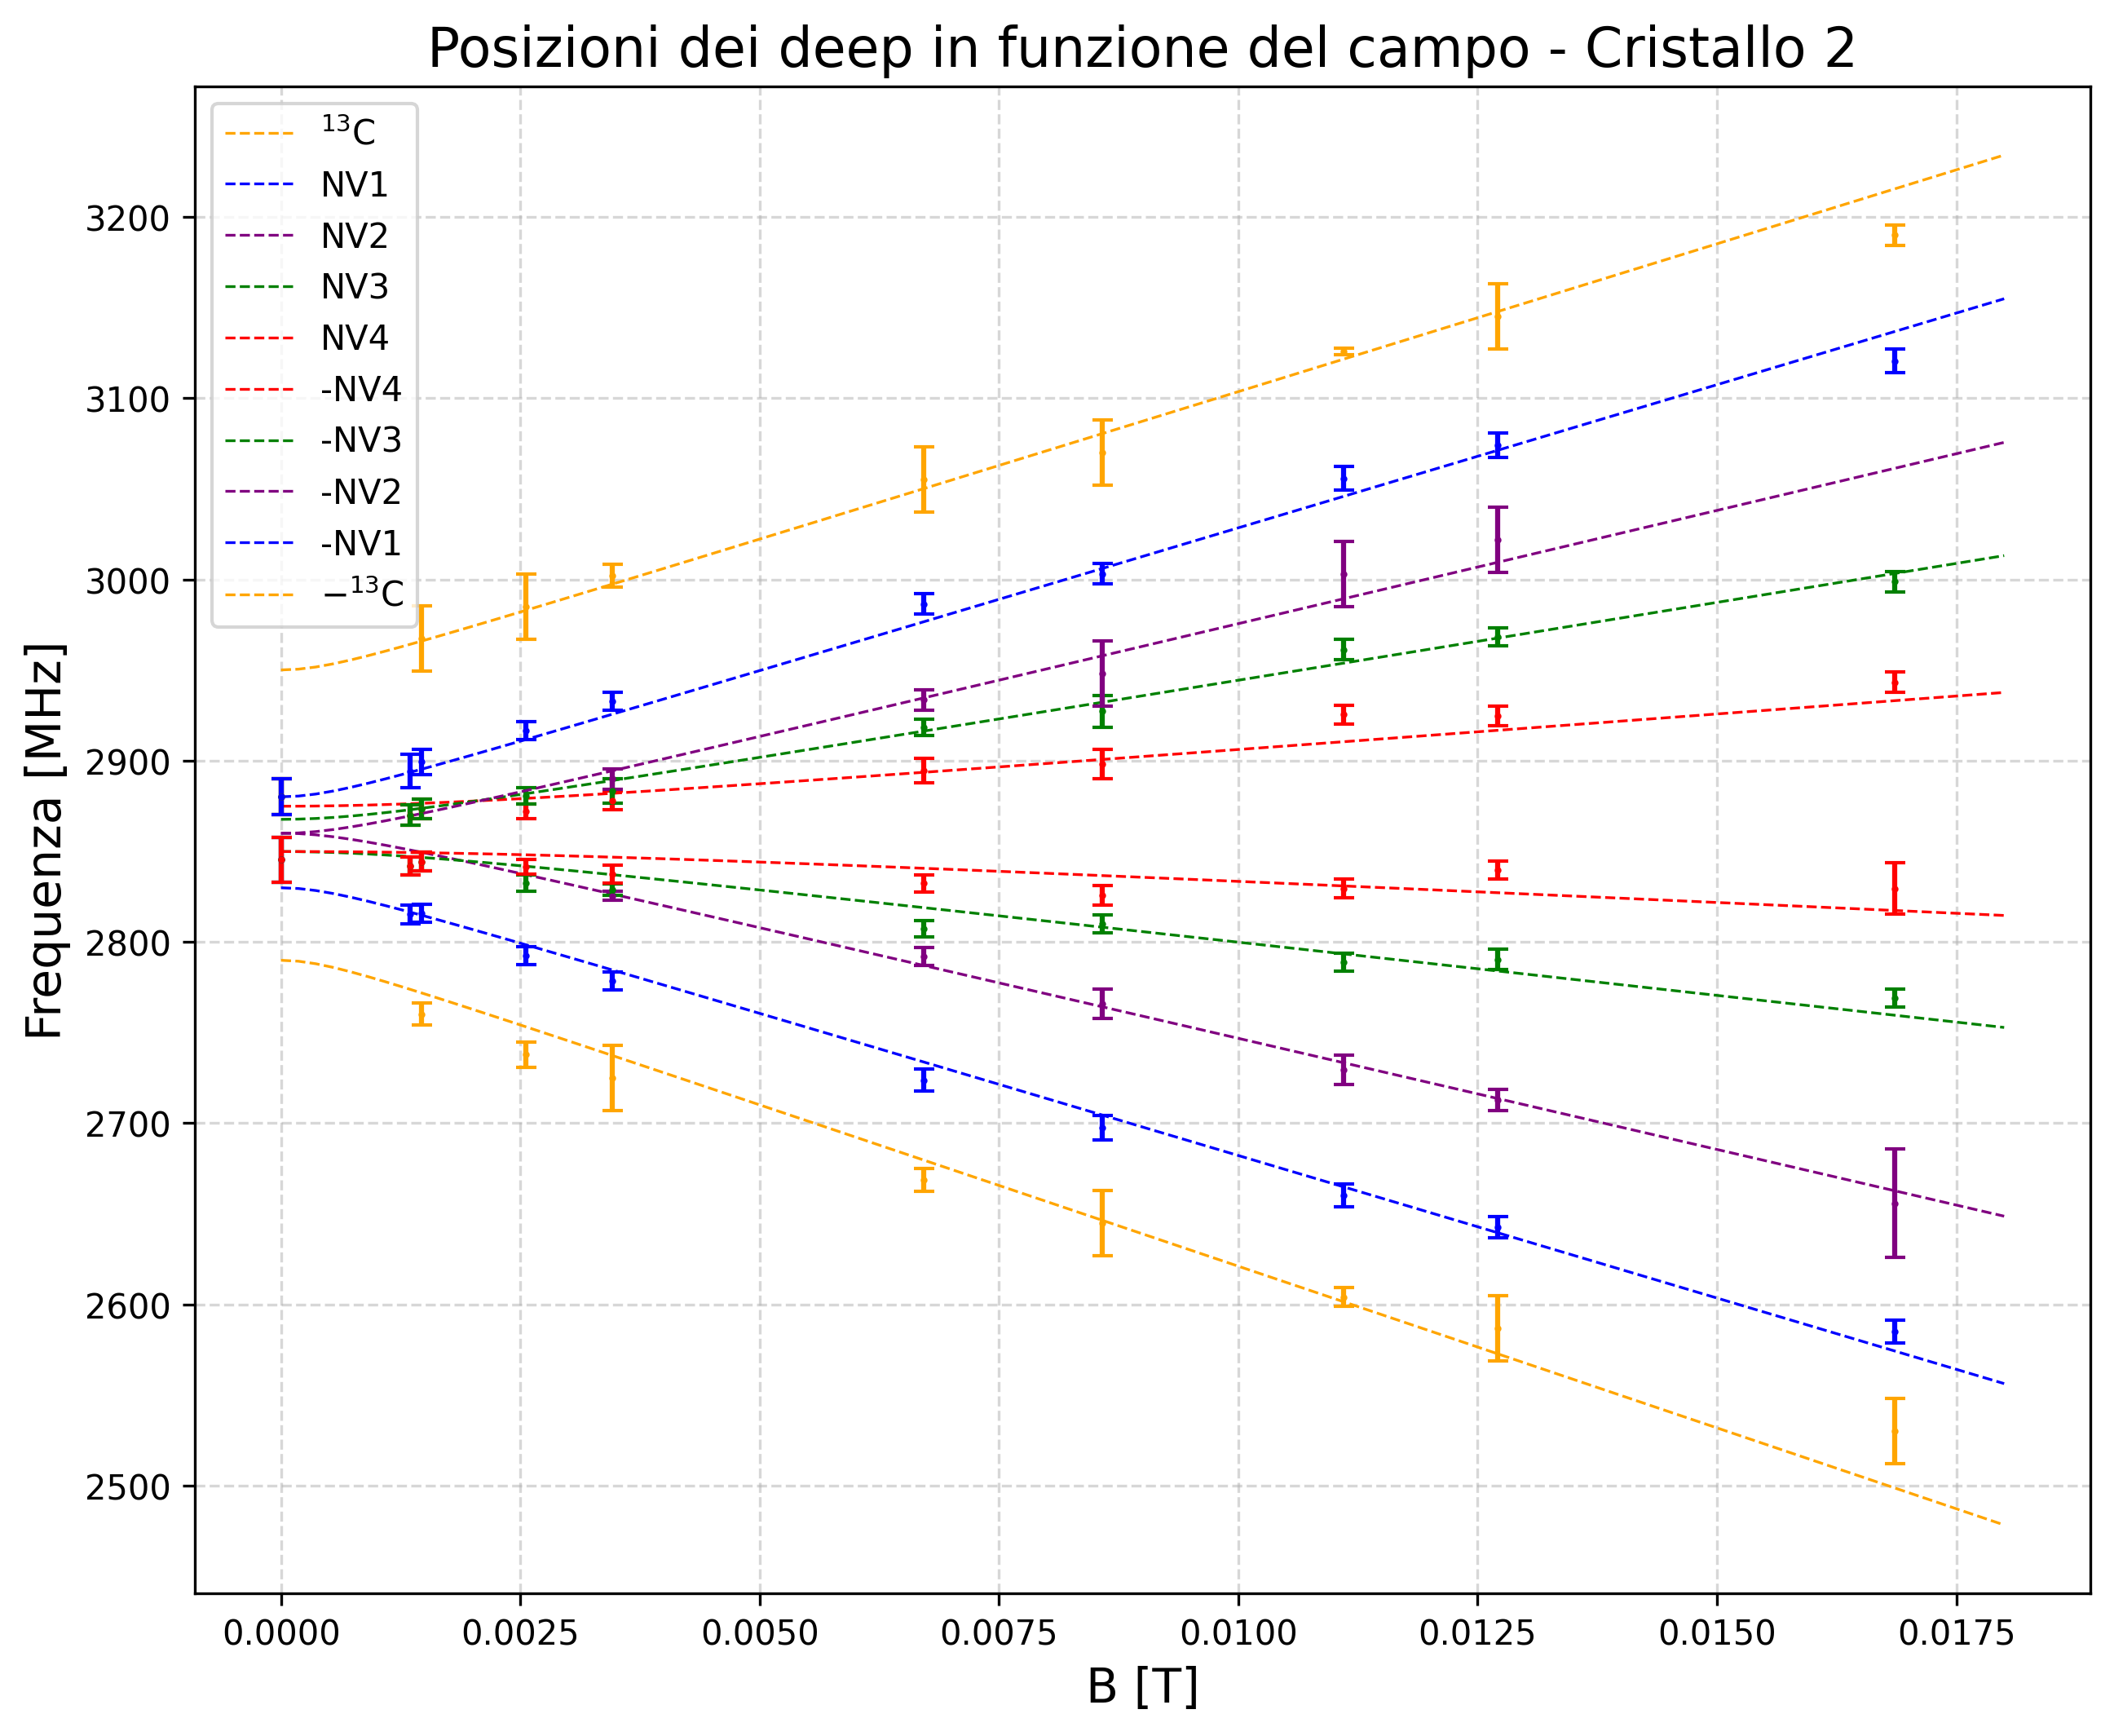

In [13]:
plt.figure(figsize=(10,8), dpi=300)
plt.title(f'Posizioni dei deep in funzione del campo - Cristallo 2', fontsize=16)
plt.xlabel('B [T]', fontsize=14)
plt.ylabel('Frequenza [MHz]', fontsize=14)

A_C13 = 50

# ??
fit_plot(r_B[2:], primissimi, err_primissimi, 15000, 2880,r"$-^{13}$C", 'orange', A=A_C13, plus=False, print_fit=True, plot_fit=True) # ??


fit_plot(r_B, primi, err_primi, 16000, 2850,'-NV1', 'blue', plus=False) # CORRETTO


fit_plot(r_B[4:], dopo_i_primi, err_dopo_i_primi, 7000, 2875,'-NV2', 'purple', plus=False) # !!


fit_plot(r_B, intermedi1, err_intermedi1, 6500, 2870, '-NV3', 'green', plus=False) # CORRETTO
fit_plot(r_B, centrali1, err_centrali1, 4000, 2870, '-NV4', 'red', plus=False) # CORRETTO
fit_plot(r_B, centrali2, err_centrali2, 2000, 2855, 'NV4', 'red') # CORRETTO
fit_plot(r_B, intermedi2, err_intermedi2, 6500, 2855, 'NV3', 'green') # CORRETTO


fit_plot(r_B[4:-1], prima_degli_ultimi, err_prima_degli_ultimi, 9000, 2860,'NV2', 'purple') # !!


fit_plot(r_B, ultimi, err_ultimi, 16000, 2860, 'NV1', 'blue') # CORRETTO

# ??
fit_plot(r_B[2:], ultimissimi, err_ultimissimi, 15000, 2860,r"$^{13}$C", 'orange', A=A_C13, print_fit=True, plot_fit=True) # ??

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])  # ordine invertito
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [14]:
for i, (gamma_f, err_gamma_f) in enumerate(zip(list_gamma_fit, list_err_gamma_fit)):
    cos_alpha = gamma_f / 28000 # gamma = 28 GHz
    alpha = np.arccos(cos_alpha)/np.pi*180
    sigma_alpha = ( 1/(28000* np.sqrt(1 - (gamma_f/28000)**2) )) * err_gamma_f
    print(f"{alpha:.2f} ± {sigma_alpha:.2f}" if i<4 else f"{-alpha:.2f} ± {sigma_alpha:.2f}")

55.77 ± 0.04
63.96 ± 0.13
77.78 ± 0.05
84.97 ± 0.13
-81.79 ± 0.06
-72.06 ± 0.02
-63.43 ± 0.23
-55.60 ± 0.04


---

## Grafico con spettro odmr e lockin a 17mm

qui mettiamo un bel grafico composto da due plot quello sopra odmr e quello sotto lockin 

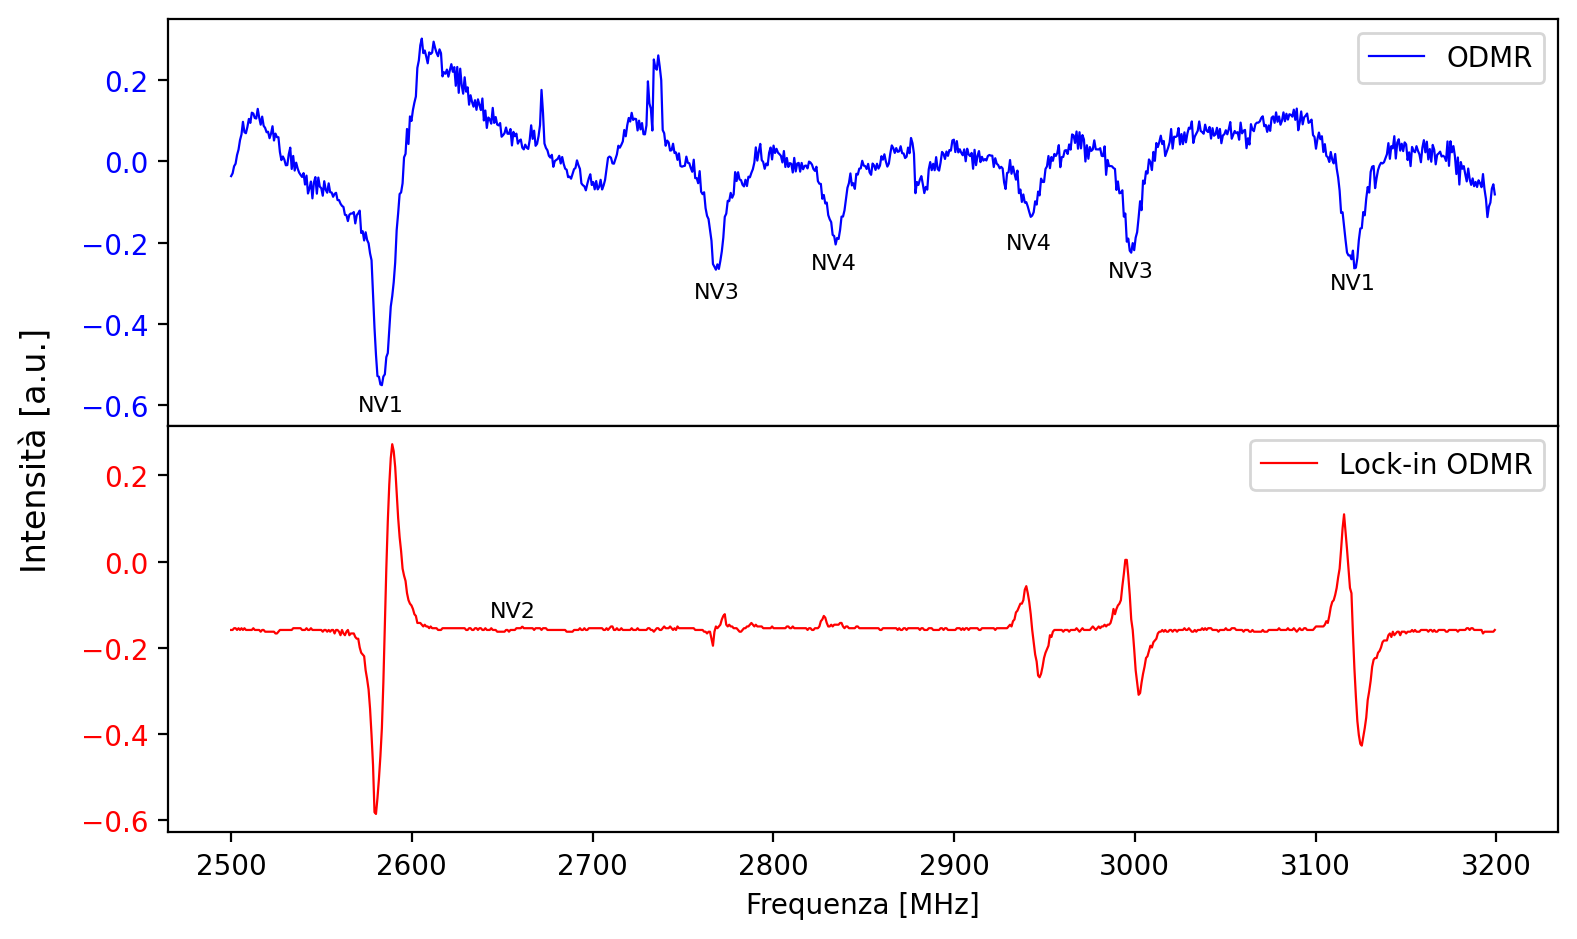

In [15]:
data = np.loadtxt("data/cristallo2_aligned_cleaned/odmr_dist_17_cleaned.csv", delimiter='|', skiprows=2)
x_od = data[:, 0]
y_od = data[:, 2]
y_lock = data[:, 3] #+ 0.165 # traslo per mettere baseline a 0

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True, gridspec_kw={'hspace': 0.0}, dpi=200)
fig.supylabel('Intensità [a.u.]')

# ODMR (sopra)
ax1.plot(x_od, y_od, 'b-', label='ODMR', linewidth=0.8)
# ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.65, 0.35)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='best')

# --- Etichette picchi su ax1 (INSERIRE QUI LE COORDINATE) ---
# Sostituisci np.nan con le coordinate (x,y) del picco e il testo desiderato
peaks = [
    {"x": 2583, "y": -0.6, "text": "NV1"},
    # non si vede NV2 a sinistra
    {"x": 2769, "y": -0.32, "text": "NV3"},
    {"x": 2834, "y": -0.25, "text": "NV4"},
    {"x": 2942, "y": -0.2, "text": "NV4"},
    {"x": 2998, "y": -0.27, "text": "NV3"},
    # non si vede NV2 a destra
    {"x": 3121, "y": -0.3, "text": "NV1"},
]

# Stile etichette (solo testo)
txt_off = (8, 0)  # offset in punti (dx, dy) rispetto al picco
bbox_kw = dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.75)

for p in peaks:
    x, y, t = p["x"], p["y"], p["text"]
    if not (np.isnan(x) or np.isnan(y)):
        ax1.annotate(
            t, xy=(x, y), xycoords='data',
            xytext=txt_off, textcoords='offset points',
            ha='right', va='center', fontsize=8,
            bbox=bbox_kw  # nessuna freccia, nessun marker
        )
        
        
# --- fine etichette ---

# Lock-in (sotto)
# Se vuoi scalare come prima, usa: y_lock * max_a
ax2.plot(x_od, y_lock, 'r-', label='Lock-in ODMR', linewidth=0.8)
ax2.set_xlabel('Frequenza [MHz]')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')

# NV2 si intravede nel lockin a sinistra
ax2.annotate(
            'NV2', xy=(2656, 0.05-0.165), xycoords='data',
            xytext=txt_off, textcoords='offset points',
            ha='right', va='center', fontsize=8,
            bbox=bbox_kw  # nessuna freccia, nessun marker
        )
        

#fig.suptitle('Spettro ODMR e Lock-in - Cristallo 2 - Distanza 17 mm', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Grafico con spettro odmr e lockin a 19mm

Centri:
  lockin    |     odmr
2586.62998  |  ---
2642.74101  |  2642.95991
2712.87535  |  ---
2790.34323  |  2789.58385
2839.85725  |  2839.67311
2924.69173  |  2923.55197
2968.41501  |  2967.48125
3019.29597  |  ---
3074.11136  |  3073.10975
3145.00000  |  ---

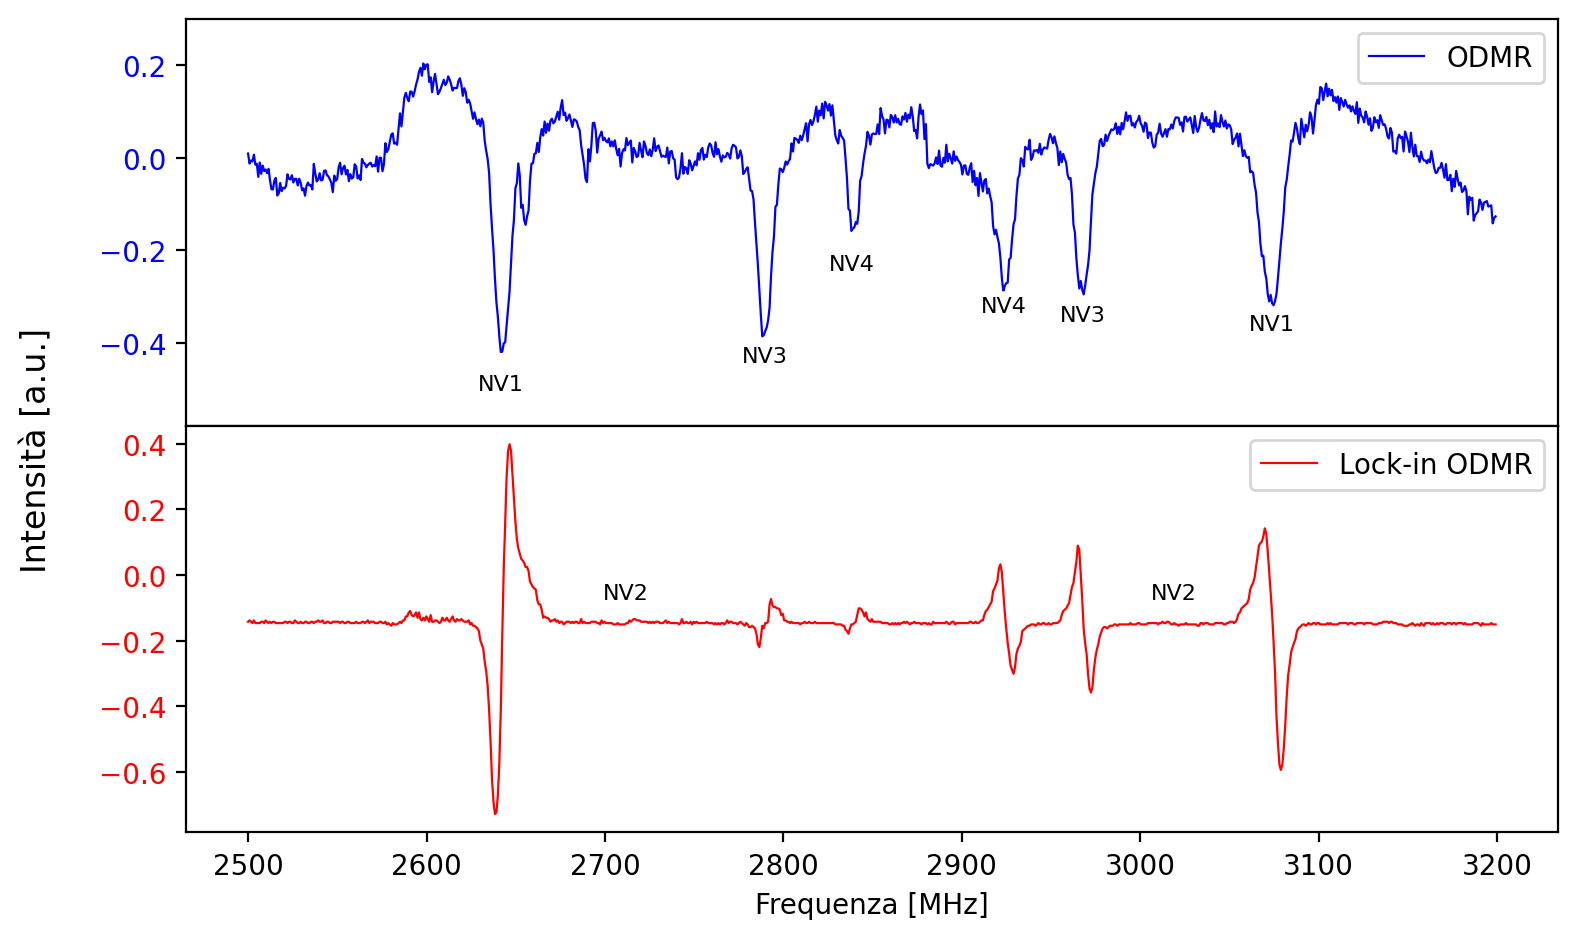

In [16]:
data = np.loadtxt("data/cristallo2_aligned_cleaned/odmr_dist_19_cleaned.csv", delimiter='|', skiprows=2)
x_od = data[:, 0]
y_od = data[:, 2]
y_lock = data[:, 3] #+ 0.155 # traslo per mettere baseline a 0

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True, gridspec_kw={'hspace': 0.0}, dpi=200)
fig.supylabel('Intensità [a.u.]')

# ODMR (sopra)
ax1.plot(x_od, y_od, 'b-', label='ODMR', linewidth=0.8)
# ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.58, 0.3)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='best')

# --- Etichette picchi su ax1 (INSERIRE QUI LE COORDINATE) ---
# Sostituisci np.nan con le coordinate (x,y) del picco e il testo desiderato
peaks = [
    {"x": 2642, "y": -0.49, "text": "NV1"},
    {"x": 2790, "y": -0.43, "text": "NV3"},
    {"x": 2839, "y": -0.23, "text": "NV4"},
    {"x": 2924, "y": -0.32, "text": "NV4"},
    {"x": 2968, "y": -0.34, "text": "NV3"},
    {"x": 3074, "y": -0.36, "text": "NV1"},
]

# Stile etichette (solo testo)
txt_off = (8, 0)  # offset in punti (dx, dy) rispetto al picco
bbox_kw = dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.75)

for p in peaks:
    x, y, t = p["x"], p["y"], p["text"]
    if not (np.isnan(x) or np.isnan(y)):
        ax1.annotate(
            t, xy=(x, y), xycoords='data',
            xytext=txt_off, textcoords='offset points',
            ha='right', va='center', fontsize=8,
            bbox=bbox_kw  # nessuna freccia, nessun marker
        )
        
        
# --- fine etichette ---

# Lock-in (sotto)
# Se vuoi scalare come prima, usa: y_lock * max_a
ax2.plot(x_od, y_lock, 'r-', label='Lock-in ODMR', linewidth=0.8)
ax2.set_xlabel('Frequenza [MHz]')
ax2.tick_params(axis='y', labelcolor='red')
#ax2.grid(True, alpha=0.3)
ax2.legend(loc='best')

# NV2 si intravede nel lockin a sinistra
peaks_lockin = [
    {"x": 2712, "y": 0.1-0.155, "text": "NV2"},
    {"x": 3019, "y": 0.1-0.155, "text": "NV2"},
]
for p in peaks_lockin:
    x, y, t = p["x"], p["y"], p["text"]
    ax2.annotate(
            t, xy=(x, y), xycoords='data',
            xytext=txt_off, textcoords='offset points',
            ha='right', va='center', fontsize=8,
            bbox=bbox_kw  # nessuna freccia, nessun marker
        )
    

#fig.suptitle('Spettro ODMR e Lock-in - Cristallo 2 - Distanza 17 mm', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Grafico con tutti i lockin a campi diversi

Prima vanno resi tutti alti uguali!

In [17]:
# Cerco il minimo dei massimi, cioè lo spettro lock-in col segnale massimo più debole
minimo_dei_massimi = 1e10
lista_dei_massimi_locali = []
for i, dist in enumerate(reversed(distanze)):
    massimo_locale = np.max(np.abs(cleaned_lockin_spectra[dist]['lock']))
    lista_dei_massimi_locali.append(massimo_locale)
    if massimo_locale < minimo_dei_massimi:
        minimo_dei_massimi = massimo_locale
# Quindi faccio in modo che tutti gli altri siano alti uguale
for i, dist in enumerate(reversed(distanze)):
    # normalizzo a se stesso
    cleaned_lockin_spectra[dist]['lock'] = cleaned_lockin_spectra[dist]['lock'] / lista_dei_massimi_locali[i] 
    # poi moltiplico per il minimo dei massimi
    #cleaned_lockin_spectra[dist]['lock'] = cleaned_lockin_spectra[dist]['lock'] * minimo_dei_massimi

In [18]:
# converto le serie x in array NumPy per usare la mask
primi       = np.asarray(primi)
dopo_i_primi = np.asarray(dopo_i_primi)
intermedi1  = np.asarray(intermedi1)
centrali1   = np.asarray(centrali1)
centrali2   = np.asarray(centrali2)
intermedi2  = np.asarray(intermedi2)
prima_degli_ultimi = np.asarray(prima_degli_ultimi)
ultimi      = np.asarray(ultimi)

In [19]:
# aggiungo delle curve che collegano i centri NV
def plot_nv_smooth(x, y, label, color, m=True):
    from scipy.interpolate import make_interp_spline
    X_Y_Spline = make_interp_spline(y, x, k=2)
    Y_new = np.linspace(min(y), max(y), 500)
    X_smooth = X_Y_Spline(Y_new)
    if m:
        # plotto i marker
        plt.plot(x, y, color=color, linestyle='', linewidth=0.8, marker='o', markersize=2)
    # plotto la curva liscia
    plt.plot(X_smooth, Y_new, label=label, color=color, linestyle='--', linewidth=0.8)

In [20]:
# aggiungo le curve di fit
def plot_nv_smooth(x, y, label, color, curva, m=True):
    if m:
        # plotto i marker
        plt.plot(x, y, color=color, linestyle='', linewidth=0.8, marker='o', markersize=2)
    # plotto la curva di fit
    plt.plot(curva[1], curva[0]*1000, label=label, color=color, linestyle='--', linewidth=0.8)

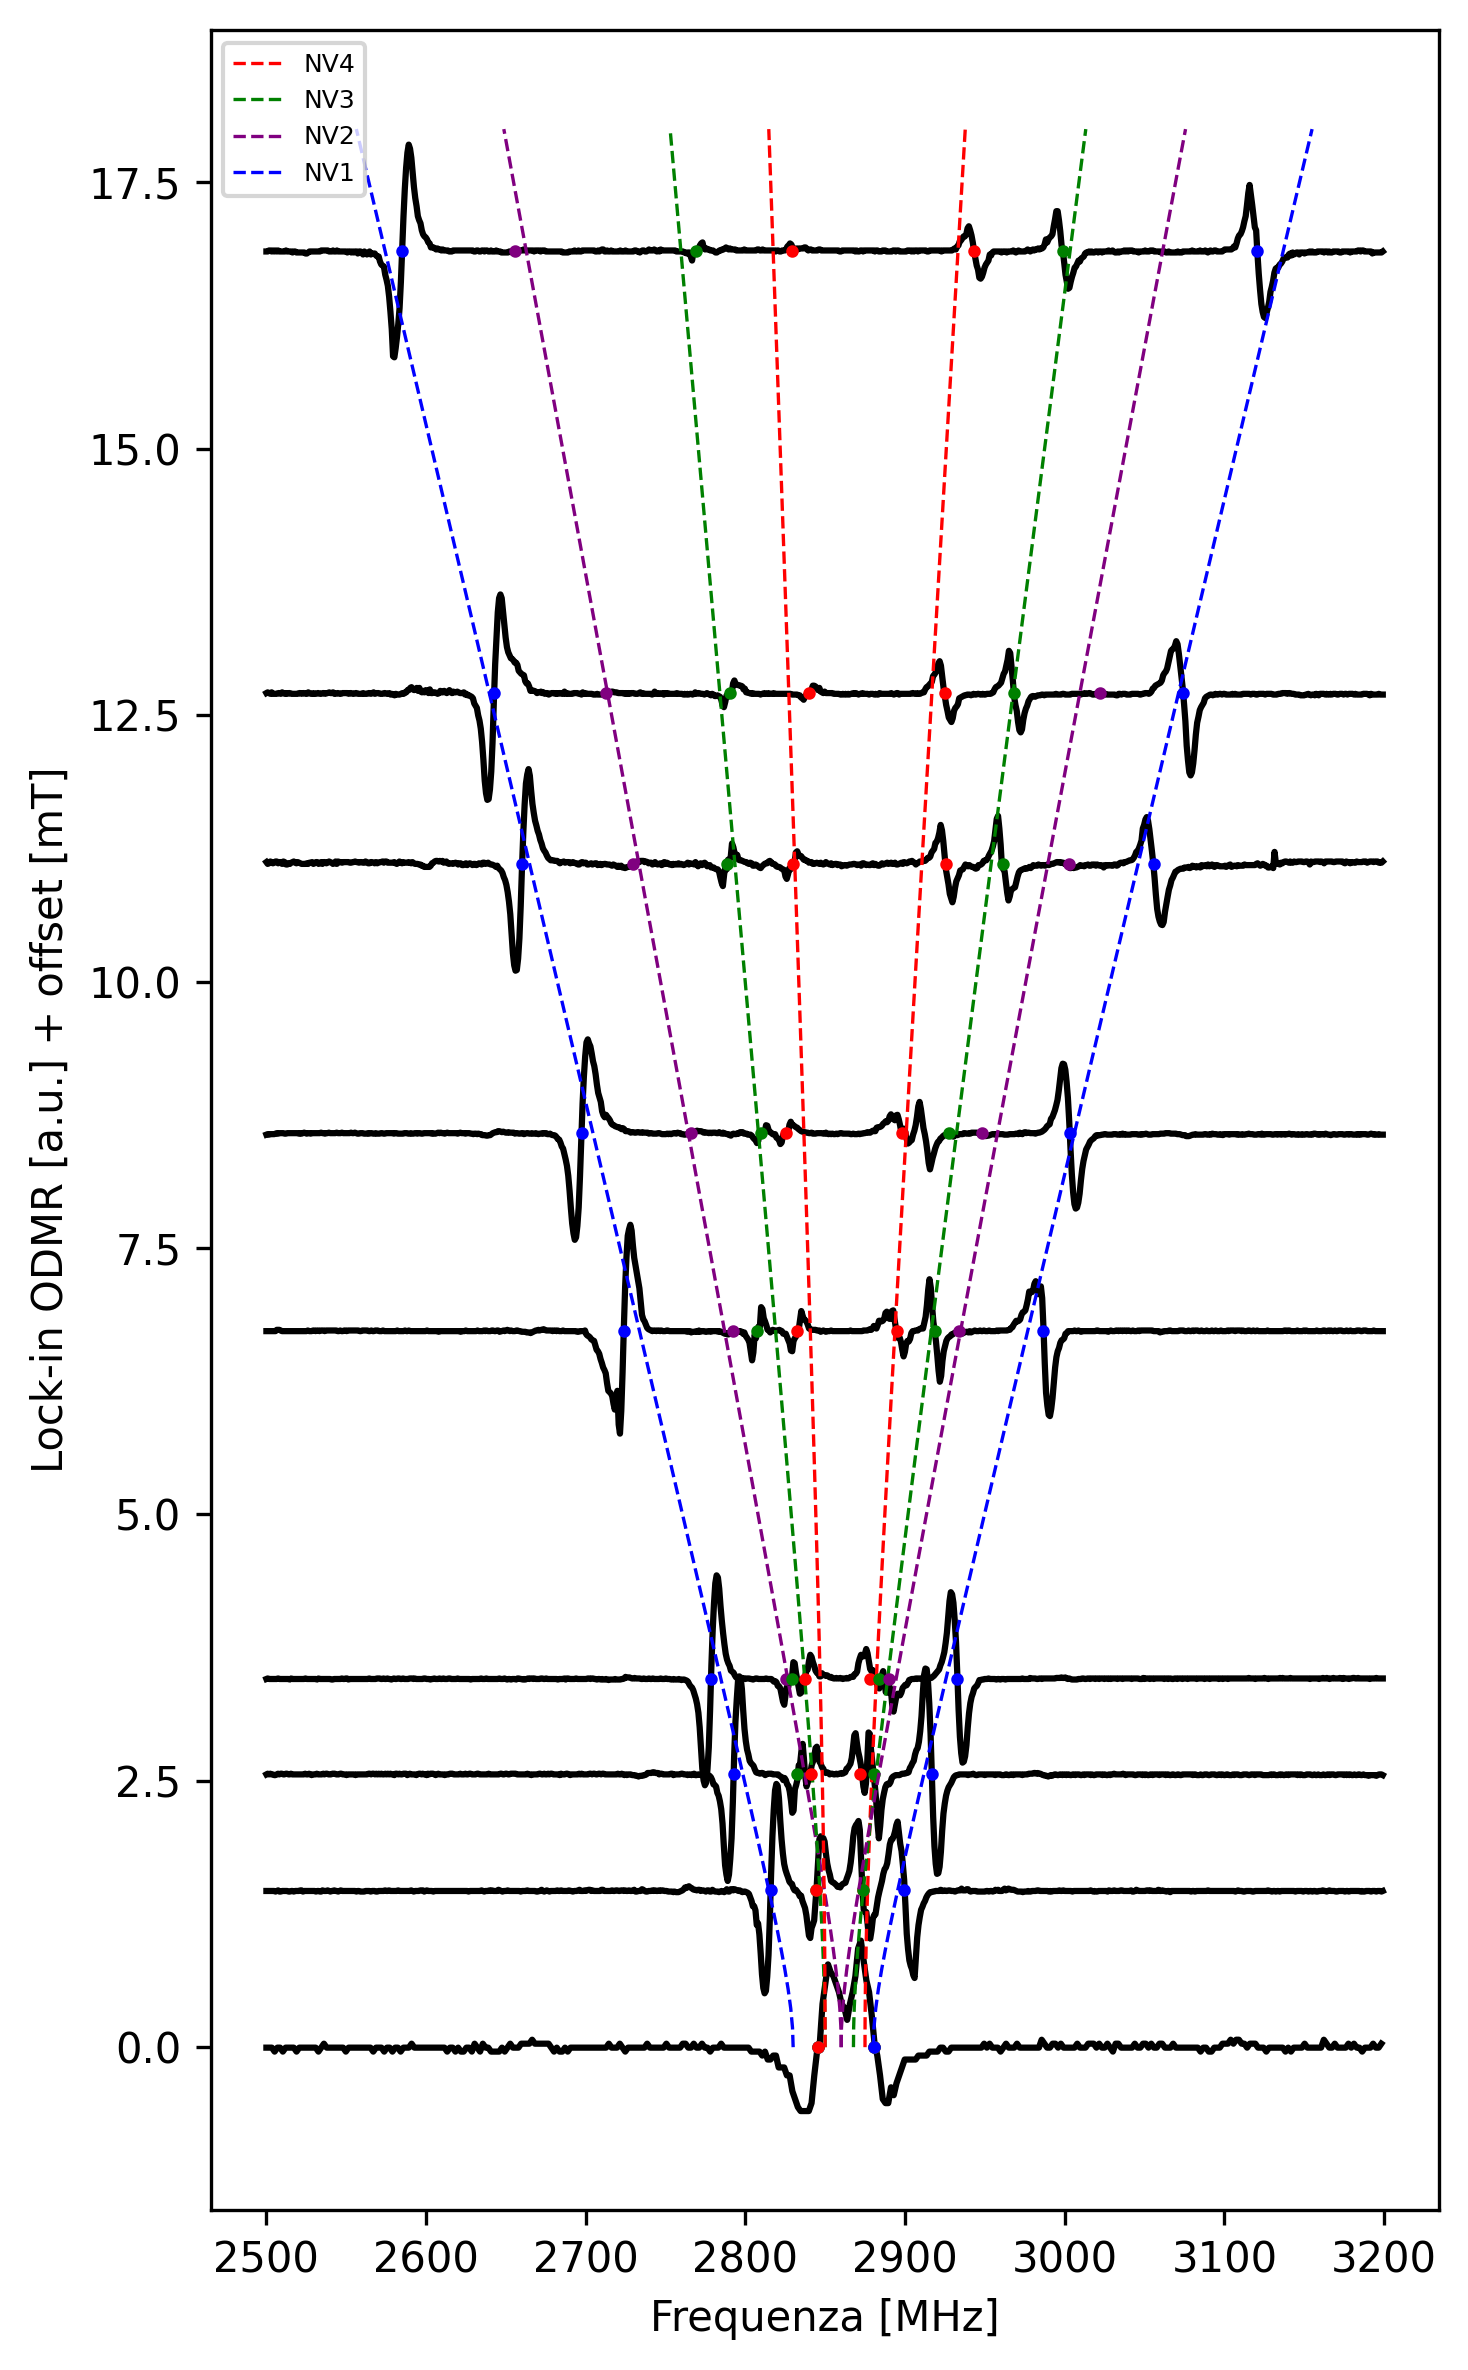

In [21]:
# stavolta serve verticale
plt.figure(figsize=(5,8), dpi=300) 

# plotto tutti gli spettri con un offset verticale pari al campo previsto
for dist, B in zip(distanze, previsioni_B):
    if dist == 40:
        continue
    plt.plot(cleaned_lockin_spectra[dist]['freq'], cleaned_lockin_spectra[dist]['lock'] + B*1000, color='black')
    
B_in_mT = np.array(r_B) * 1000

mask = np.ones(B_in_mT.shape[0], dtype=bool)
mask[1] = False # maschera che toglie il secondo punto
plot_nv_smooth(primi[mask], B_in_mT[mask], label='', color='blue', curva=curve_fittate[0])
plot_nv_smooth(dopo_i_primi, B_in_mT[4:], label='', color='purple', curva=curve_fittate[1])
plot_nv_smooth(intermedi1[mask], B_in_mT[mask], label='', color='green', curva=curve_fittate[2])
plot_nv_smooth(centrali1[mask], B_in_mT[mask], label='', color='red', curva=curve_fittate[3])
plot_nv_smooth(centrali2[mask], B_in_mT[mask], label='NV4', color='red', curva=curve_fittate[4])
plot_nv_smooth(intermedi2[mask], B_in_mT[mask], label='NV3', color='green', curva=curve_fittate[5])
plot_nv_smooth(prima_degli_ultimi, B_in_mT[4:-1],label='NV2', color='purple', curva=curve_fittate[6])
plot_nv_smooth(ultimi[mask], B_in_mT[mask], label='NV1', color='blue', curva=curve_fittate[7])
    
    
plt.xlabel('Frequenza [MHz]')
plt.ylabel('Lock-in ODMR [a.u.] + offset [mT]')
plt.legend(fontsize=6)
plt.tight_layout()
plt.show()

In [22]:
# HACK: c_h: correct height!
def c_h(nu0s, spettro):
    # ti dò la frequenza, tu mi dici l'altezza più vicina lì
    heights = []
    for nu0 in nu0s:
        idx = (np.abs(spettro['freq'] - nu0)).argmin()
        heights.append(spettro['lock'][idx])
    return np.array(heights) + B_in_mT

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_95695/1056051712.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


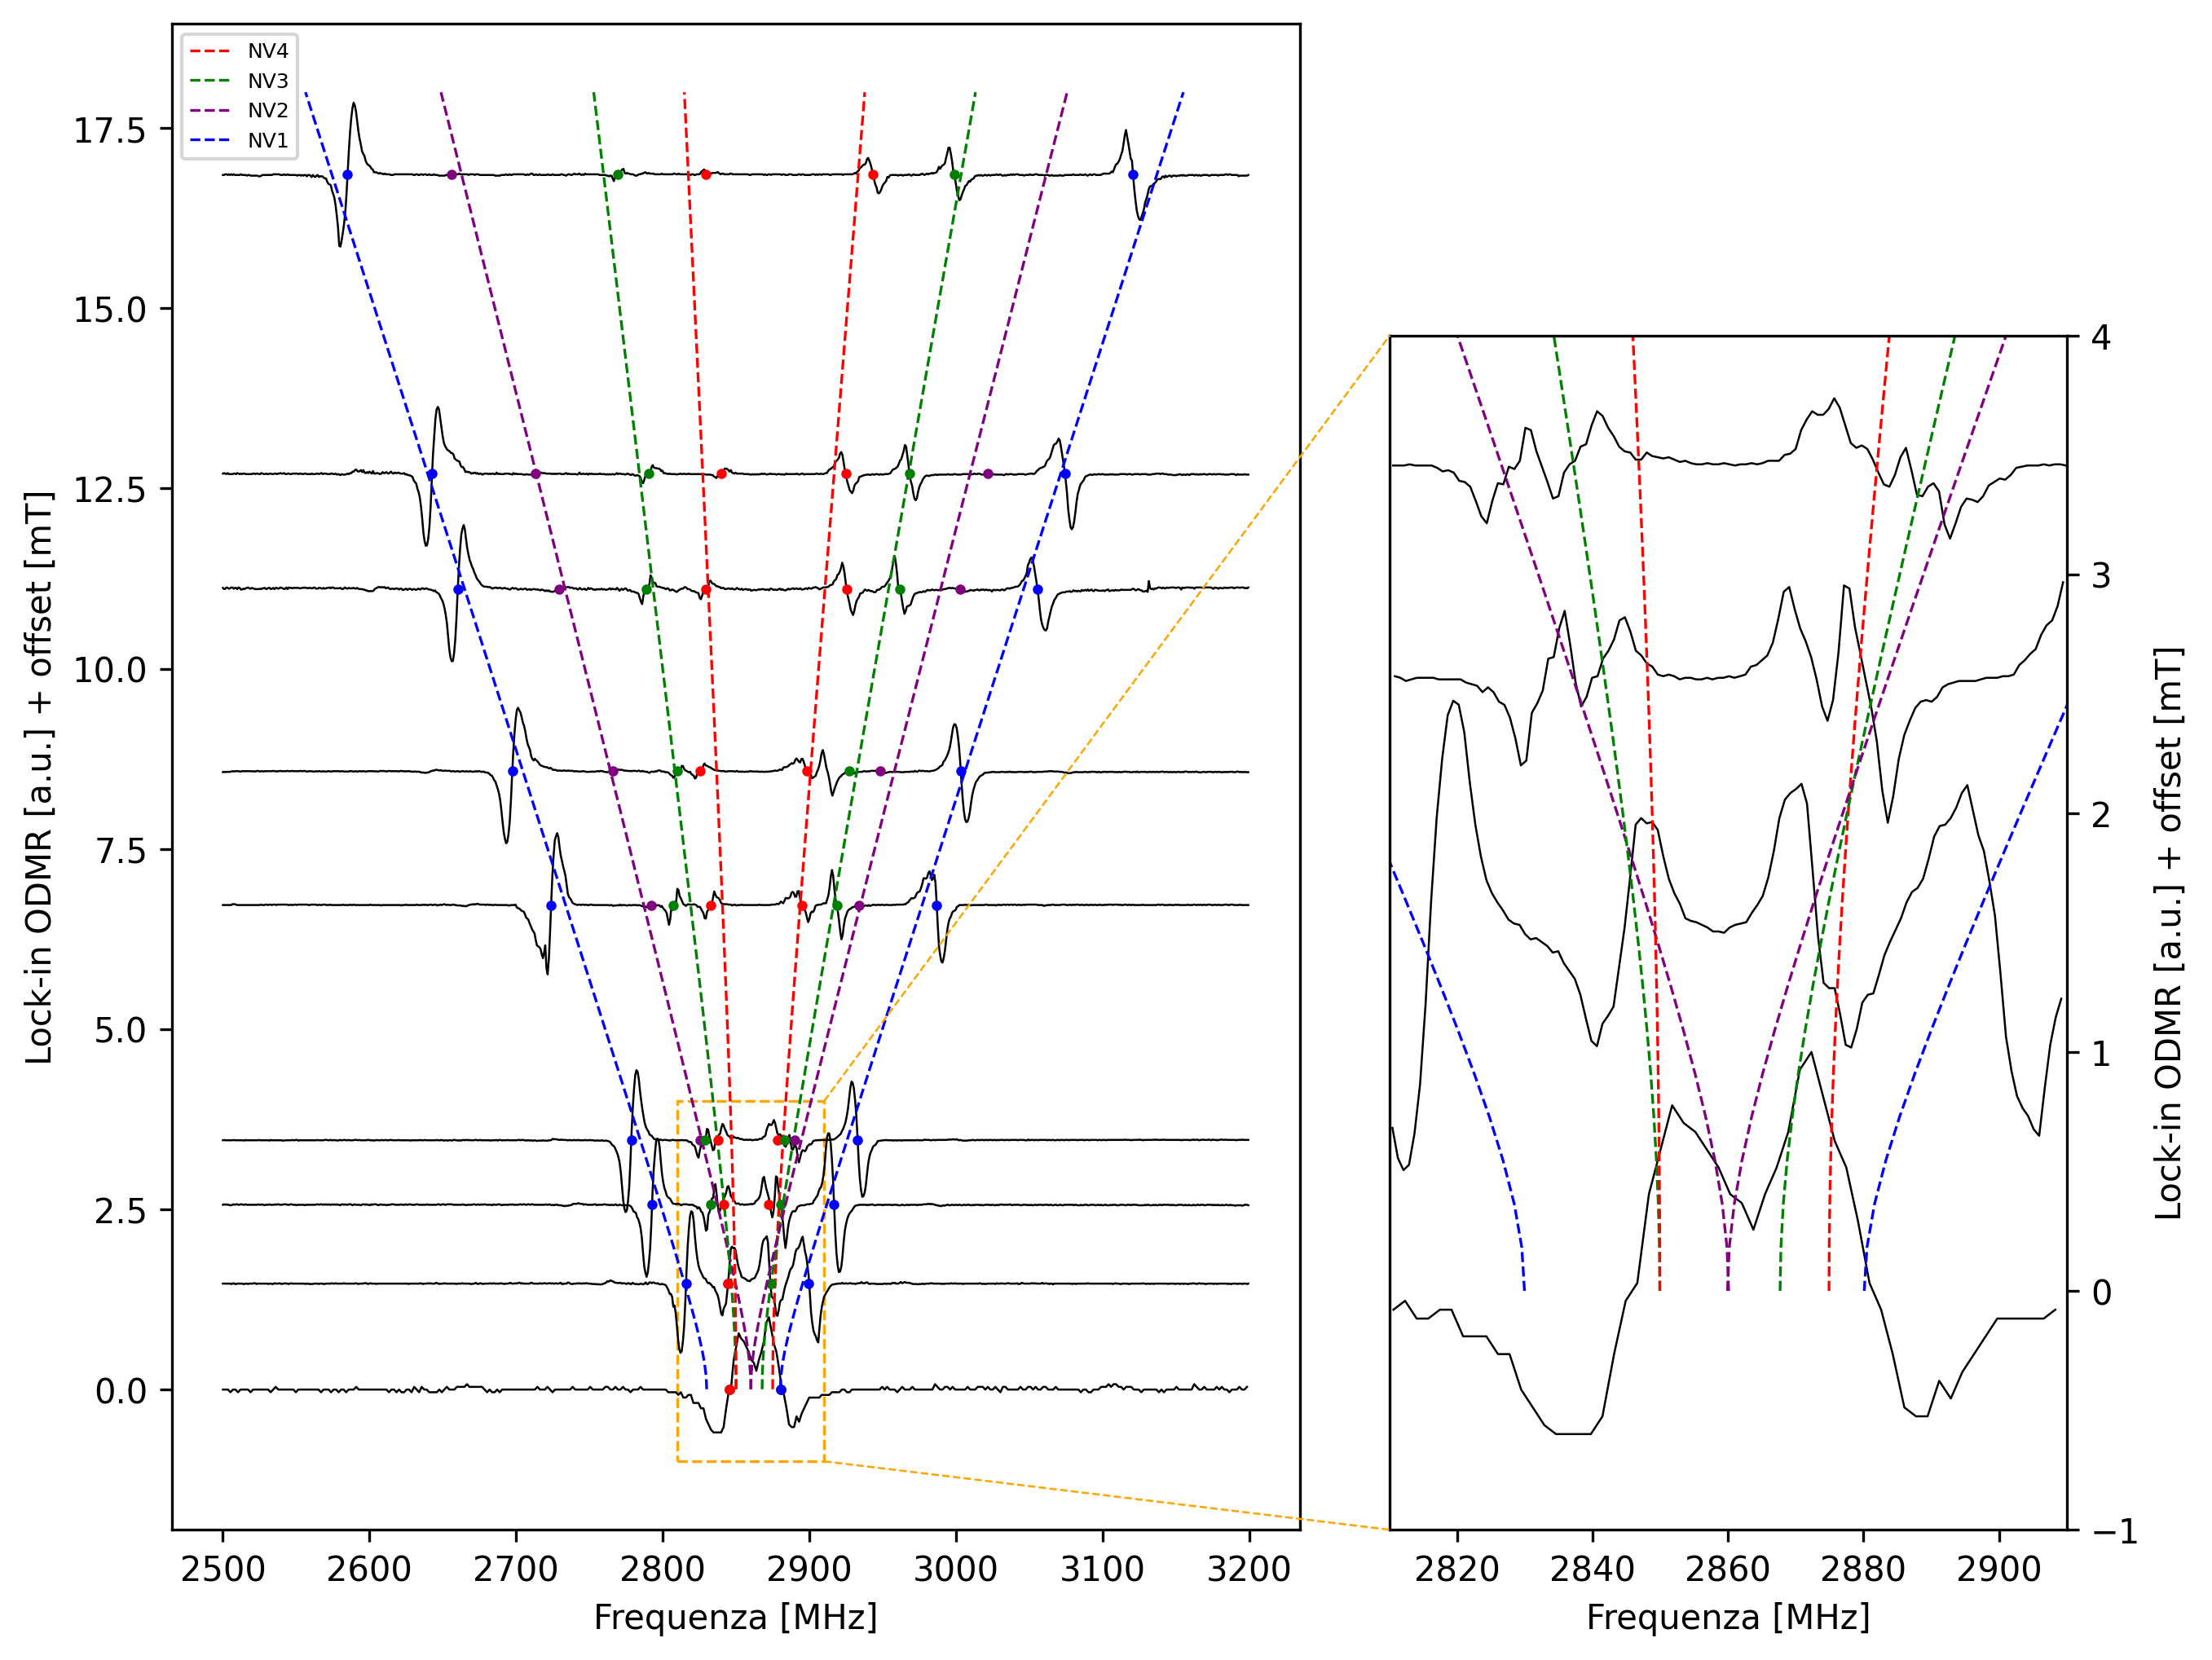

In [23]:
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
def plot_lockin_con_zoom():
    x_zoom = (2810, 2910)
    y_zoom = (-1, 4)  # mT

    B_in_mT = np.array(r_B) * 1000
    mask = np.ones(B_in_mT.shape[0], dtype=bool)
    mask[1] = False

    fig = plt.figure(figsize=(10,8), dpi=300)
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.6], wspace=0.10)
    ax_full = fig.add_subplot(gs[:, 0])
    ax_zoom = fig.add_subplot(gs[1:5, 1])

    # Spettri completi (pannello sinistra)
    for dist, B in zip(distanze, previsioni_B):
        if dist == 40:
            continue
        ax_full.plot(cleaned_lockin_spectra[dist]['freq'],
                     cleaned_lockin_spectra[dist]['lock'] + B*1000,
                     color='black', linewidth=0.6)

    # Curve smooth (usa la versione globale di plot_nv_smooth)
    plt.sca(ax_full)
    plot_nv_smooth(primi[mask], B_in_mT[mask], label='', color='blue', curva=curve_fittate[0])
    plot_nv_smooth(dopo_i_primi, B_in_mT[4:], label='', color='purple', curva=curve_fittate[1])
    plot_nv_smooth(intermedi1[mask], B_in_mT[mask], label='', color='green', curva=curve_fittate[2])
    plot_nv_smooth(centrali1[mask], B_in_mT[mask], label='', color='red', curva=curve_fittate[3])
    plot_nv_smooth(centrali2[mask], B_in_mT[mask], label='NV4', color='red', curva=curve_fittate[4])
    plot_nv_smooth(intermedi2[mask], B_in_mT[mask], label='NV3', color='green', curva=curve_fittate[5])
    plot_nv_smooth(prima_degli_ultimi, B_in_mT[4:-1], label='NV2', color='purple', curva=curve_fittate[6])
    plot_nv_smooth(ultimi[mask], B_in_mT[mask], label='NV1', color='blue', curva=curve_fittate[7])

    ax_full.set_xlabel('Frequenza [MHz]')
    ax_full.set_ylabel('Lock-in ODMR [a.u.] + offset [mT]')
    ax_full.legend(fontsize=6)

    # Rettangolo zoom
    rect = Rectangle((x_zoom[0], y_zoom[0]),
                     x_zoom[1]-x_zoom[0],
                     y_zoom[1]-y_zoom[0],
                     linewidth=0.8, edgecolor='orange',
                     facecolor='none', linestyle='--')
    ax_full.add_patch(rect)

    # Pannello zoom (spettri grezzi)
    for dist, B in zip(distanze, previsioni_B):
        if dist == 40:
            continue
        freq = cleaned_lockin_spectra[dist]['freq']
        lock = cleaned_lockin_spectra[dist]['lock'] + B*1000
        m = (freq >= x_zoom[0]) & (freq <= x_zoom[1]) & (lock >= y_zoom[0]) & (lock <= y_zoom[1])
        if np.any(m):
            ax_zoom.plot(freq[m], lock[m], color='black', linewidth=0.6)

    # Curve smooth ANCHE nel pannello zoom (stesse serie)
    plt.sca(ax_zoom)
    plot_nv_smooth(primi[mask], B_in_mT[mask], label='', color='blue', m=False, curva=curve_fittate[0])
    plot_nv_smooth(dopo_i_primi, B_in_mT[4:]-0.1, label='', color='purple', m=False, curva=curve_fittate[1])
    plot_nv_smooth((intermedi1[mask])[1:], (B_in_mT[mask])[1:], label='', color='green', m=False, curva=curve_fittate[2])
    plot_nv_smooth(centrali1[mask], B_in_mT[mask]+0.05, label='', color='red', m=False, curva=curve_fittate[3])
    plot_nv_smooth(centrali2[mask], B_in_mT[mask]+0.05, label='', color='red', m=False, curva=curve_fittate[4])
    plot_nv_smooth((intermedi2[mask])[1:], (B_in_mT[mask]-0.05)[1:], label='', color='green', m=False, curva=curve_fittate[5])
    plot_nv_smooth(prima_degli_ultimi, B_in_mT[4:-1]-0.2, label='', color='purple', m=False, curva=curve_fittate[6])
    plot_nv_smooth(ultimi[mask], B_in_mT[mask]+0.05, label='', color='blue', m=False, curva=curve_fittate[7])

    ax_zoom.set_xlim(*x_zoom)
    ax_zoom.set_ylim(*y_zoom)
    ax_zoom.set_xlabel('Frequenza [MHz]')
    ax_zoom.set_ylabel('Lock-in ODMR [a.u.] + offset [mT]')
    #ax_zoom.set_title('Zoom', fontsize=9)

    # Ticks del pannello zoom a destra
    ax_zoom.yaxis.tick_right()
    ax_zoom.yaxis.set_label_position('right')
    ax_zoom.tick_params(axis='y', labelright=True, labelleft=False)

    # Linee tratteggiate collegamento (vertici destri -> vertici sinistri)
    def connect(p_full, p_zoom):
        fig.canvas.draw()
        fc = ax_full.transData.transform(p_full)
        zc = ax_zoom.transData.transform(p_zoom)
        fc_fig = fig.transFigure.inverted().transform(fc)
        zc_fig = fig.transFigure.inverted().transform(zc)
        line = plt.Line2D([fc_fig[0], zc_fig[0]], [fc_fig[1], zc_fig[1]],
                          transform=fig.transFigure, color='orange',
                          linestyle='--', linewidth=0.6)
        fig.add_artist(line)

    rect_tr = (x_zoom[1], y_zoom[1])
    rect_br = (x_zoom[1], y_zoom[0])
    zoom_tl = (x_zoom[0], y_zoom[1])
    zoom_bl = (x_zoom[0], y_zoom[0])
    connect(rect_tr, zoom_tl)
    connect(rect_br, zoom_bl)

    plt.tight_layout()
    plt.show()

plot_lockin_con_zoom()